In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import joblib

from sklearn.metrics import (
    f1_score,
    recall_score,
    accuracy_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    RocCurveDisplay
)

import optuna
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

In [7]:
# load train, test features
data = joblib.load("../artifacts/baseline_dataset.pkl")

X_train = data["X_train"]
X_test = data["X_test"]
y_train = data["y_train"]
y_test = data["y_test"]

In [3]:
pd.DataFrame(
    {
        "Data Types": X_train.dtypes,
        "Missing Values": X_train.isnull().sum(),
        "Unique Values": X_train.nunique(),
        "Sample Values": [X_train[col].sample(3).tolist() for col in X_train.columns]
    })

,Data Types,Missing Values,Unique Values,Sample Values
ID,int64,0,133803,"[48608, 54502, 78308]"
year,int64,0,1,"[2019, 2019, 2019]"
loan_limit,object,0,2,"[cf, cf, cf]"
Gender,object,0,4,"[Male, Joint, Joint]"
approv_in_adv,object,0,2,"[nopre, nopre, nopre]"
loan_type,object,0,3,"[type1, type1, type3]"
loan_purpose,object,0,4,"[p3, p4, p4]"
Credit_Worthiness,object,0,2,"[l1, l1, l1]"
open_credit,object,0,2,"[nopc, nopc, nopc]"
business_or_commercial,object,0,2,"[nob/c, nob/c, nob/c]"


[I 2026-01-12 17:05:53,585] A new study created in memory with name: no-name-c40c5f80-6f9e-4dfd-af20-b54937c44a82
Best trial: 0. Best value: 0.646007:   0%|          | 1/200 [00:07<24:11,  7.29s/it, 7.29/1200 seconds]

[I 2026-01-12 17:06:00,878] Trial 0 finished with value: 0.6460073789085689 and parameters: {'C': 0.9516927216405296}. Best is trial 0 with value: 0.6460073789085689.


Best trial: 0. Best value: 0.646007:   1%|          | 2/200 [00:11<18:46,  5.69s/it, 11.86/1200 seconds]

[I 2026-01-12 17:06:05,447] Trial 1 finished with value: 0.6277305566268349 and parameters: {'C': 0.0004225790992954228}. Best is trial 0 with value: 0.6460073789085689.


Best trial: 0. Best value: 0.646007:   2%|▏         | 3/200 [00:18<19:24,  5.91s/it, 18.04/1200 seconds]

[I 2026-01-12 17:06:11,624] Trial 2 finished with value: 0.644295012699687 and parameters: {'C': 0.00547197349238816}. Best is trial 0 with value: 0.6460073789085689.


Best trial: 0. Best value: 0.646007:   2%|▏         | 4/200 [00:23<19:17,  5.91s/it, 23.94/1200 seconds]

[I 2026-01-12 17:06:17,521] Trial 3 finished with value: 0.6456910204265253 and parameters: {'C': 0.017085587981881933}. Best is trial 0 with value: 0.6460073789085689.


Best trial: 0. Best value: 0.646007:   2%|▎         | 5/200 [00:27<16:15,  5.00s/it, 27.34/1200 seconds]

[I 2026-01-12 17:06:20,925] Trial 4 finished with value: 0.6396380385473455 and parameters: {'C': 0.0018171085533979442}. Best is trial 0 with value: 0.6460073789085689.


Best trial: 0. Best value: 0.646007:   3%|▎         | 6/200 [00:31<14:45,  4.56s/it, 31.05/1200 seconds]

[I 2026-01-12 17:06:24,632] Trial 5 finished with value: 0.6409084800072877 and parameters: {'C': 0.0023114424004638907}. Best is trial 0 with value: 0.6460073789085689.


Best trial: 6. Best value: 0.646272:   4%|▎         | 7/200 [00:35<14:59,  4.66s/it, 35.90/1200 seconds]

[I 2026-01-12 17:06:29,487] Trial 6 finished with value: 0.6462718930344044 and parameters: {'C': 8.077133594980342}. Best is trial 6 with value: 0.6462718930344044.


Best trial: 6. Best value: 0.646272:   4%|▍         | 8/200 [00:41<15:50,  4.95s/it, 41.47/1200 seconds]

[I 2026-01-12 17:06:35,056] Trial 7 finished with value: 0.64611673955034 and parameters: {'C': 0.38522614183596243}. Best is trial 6 with value: 0.6462718930344044.


Best trial: 6. Best value: 0.646272:   4%|▍         | 9/200 [00:46<16:19,  5.13s/it, 47.00/1200 seconds]

[I 2026-01-12 17:06:40,582] Trial 8 finished with value: 0.6451344059351214 and parameters: {'C': 0.010142669102967468}. Best is trial 6 with value: 0.6462718930344044.


Best trial: 6. Best value: 0.646272:   5%|▌         | 10/200 [00:49<13:58,  4.41s/it, 49.81/1200 seconds]

[I 2026-01-12 17:06:43,395] Trial 9 finished with value: 0.6306934566531536 and parameters: {'C': 0.0005163538634722048}. Best is trial 6 with value: 0.6462718930344044.


Best trial: 6. Best value: 0.646272:   6%|▌         | 11/200 [00:55<14:49,  4.70s/it, 55.17/1200 seconds]

[I 2026-01-12 17:06:48,759] Trial 10 finished with value: 0.6460309501271011 and parameters: {'C': 64.98872774476264}. Best is trial 6 with value: 0.6462718930344044.


Best trial: 6. Best value: 0.646272:   6%|▌         | 12/200 [00:59<14:50,  4.74s/it, 59.99/1200 seconds]

[I 2026-01-12 17:06:53,577] Trial 11 finished with value: 0.6461461346834573 and parameters: {'C': 1.5977597390736085}. Best is trial 6 with value: 0.6462718930344044.


Best trial: 6. Best value: 0.646272:   6%|▋         | 13/200 [01:05<15:20,  4.92s/it, 65.33/1200 seconds]

[I 2026-01-12 17:06:58,913] Trial 12 finished with value: 0.6461144583269232 and parameters: {'C': 15.836051624994253}. Best is trial 6 with value: 0.6462718930344044.


Best trial: 6. Best value: 0.646272:   7%|▋         | 14/200 [01:10<15:17,  4.93s/it, 70.30/1200 seconds]

[I 2026-01-12 17:07:03,883] Trial 13 finished with value: 0.6460783279913037 and parameters: {'C': 5.606749597153804}. Best is trial 6 with value: 0.6462718930344044.


Best trial: 14. Best value: 0.64628:   8%|▊         | 15/200 [01:15<15:46,  5.12s/it, 75.84/1200 seconds]

[I 2026-01-12 17:07:09,423] Trial 14 finished with value: 0.6462795526076766 and parameters: {'C': 2.414410836386688}. Best is trial 14 with value: 0.6462795526076766.


Best trial: 14. Best value: 0.64628:   8%|▊         | 16/200 [01:20<15:23,  5.02s/it, 80.63/1200 seconds]

[I 2026-01-12 17:07:14,214] Trial 15 finished with value: 0.6459907484866331 and parameters: {'C': 0.07216831940525774}. Best is trial 14 with value: 0.6462795526076766.


Best trial: 14. Best value: 0.64628:   8%|▊         | 17/200 [01:26<16:05,  5.27s/it, 86.50/1200 seconds]

[I 2026-01-12 17:07:20,083] Trial 16 finished with value: 0.6461306018537306 and parameters: {'C': 94.71758468389453}. Best is trial 14 with value: 0.6462795526076766.


Best trial: 14. Best value: 0.64628:   9%|▉         | 18/200 [01:31<15:47,  5.21s/it, 91.54/1200 seconds]

[I 2026-01-12 17:07:25,130] Trial 17 finished with value: 0.6460582484316936 and parameters: {'C': 6.620856174827784}. Best is trial 14 with value: 0.6462795526076766.


Best trial: 14. Best value: 0.64628:  10%|▉         | 19/200 [01:36<15:23,  5.10s/it, 96.40/1200 seconds]

[I 2026-01-12 17:07:29,981] Trial 18 finished with value: 0.6461167810752131 and parameters: {'C': 0.15340671881384024}. Best is trial 14 with value: 0.6462795526076766.


Best trial: 14. Best value: 0.64628:  10%|█         | 20/200 [01:41<15:08,  5.05s/it, 101.32/1200 seconds]

[I 2026-01-12 17:07:34,907] Trial 19 finished with value: 0.6461666281235107 and parameters: {'C': 20.923122995013337}. Best is trial 14 with value: 0.6462795526076766.


Best trial: 14. Best value: 0.64628:  10%|█         | 21/200 [01:46<14:54,  5.00s/it, 106.20/1200 seconds]

[I 2026-01-12 17:07:39,786] Trial 20 finished with value: 0.6461276964962661 and parameters: {'C': 1.8328523685628229}. Best is trial 14 with value: 0.6462795526076766.


Best trial: 14. Best value: 0.64628:  11%|█         | 22/200 [01:51<14:58,  5.05s/it, 111.37/1200 seconds]

[I 2026-01-12 17:07:44,960] Trial 21 finished with value: 0.6461077262043353 and parameters: {'C': 18.454408562049913}. Best is trial 14 with value: 0.6462795526076766.


Best trial: 22. Best value: 0.646319:  12%|█▏        | 23/200 [01:56<14:57,  5.07s/it, 116.50/1200 seconds]

[I 2026-01-12 17:07:50,082] Trial 22 finished with value: 0.6463187003590903 and parameters: {'C': 23.420609992026577}. Best is trial 22 with value: 0.6463187003590903.


Best trial: 23. Best value: 0.646326:  12%|█▏        | 24/200 [02:01<14:30,  4.94s/it, 121.15/1200 seconds]

[I 2026-01-12 17:07:54,731] Trial 23 finished with value: 0.6463255739231989 and parameters: {'C': 4.295578747122202}. Best is trial 23 with value: 0.6463255739231989.


Best trial: 23. Best value: 0.646326:  12%|█▎        | 25/200 [02:06<14:47,  5.07s/it, 126.52/1200 seconds]

[I 2026-01-12 17:08:00,106] Trial 24 finished with value: 0.6460936941112868 and parameters: {'C': 3.010276431326302}. Best is trial 23 with value: 0.6463255739231989.


Best trial: 23. Best value: 0.646326:  13%|█▎        | 26/200 [02:12<15:11,  5.24s/it, 132.14/1200 seconds]

[I 2026-01-12 17:08:05,726] Trial 25 finished with value: 0.6460291187183059 and parameters: {'C': 0.5147721121839922}. Best is trial 23 with value: 0.6463255739231989.


Best trial: 23. Best value: 0.646326:  14%|█▎        | 27/200 [02:17<15:01,  5.21s/it, 137.28/1200 seconds]

[I 2026-01-12 17:08:10,866] Trial 26 finished with value: 0.6461516656804479 and parameters: {'C': 47.39362932314031}. Best is trial 23 with value: 0.6463255739231989.


Best trial: 23. Best value: 0.646326:  14%|█▍        | 28/200 [02:22<15:06,  5.27s/it, 142.69/1200 seconds]

[I 2026-01-12 17:08:16,274] Trial 27 finished with value: 0.6461720145859178 and parameters: {'C': 0.09068914148807732}. Best is trial 23 with value: 0.6463255739231989.


Best trial: 23. Best value: 0.646326:  14%|█▍        | 29/200 [02:28<15:07,  5.31s/it, 148.08/1200 seconds]

[I 2026-01-12 17:08:21,666] Trial 28 finished with value: 0.646258373228537 and parameters: {'C': 0.44902662463635457}. Best is trial 23 with value: 0.6463255739231989.


Best trial: 23. Best value: 0.646326:  15%|█▌        | 30/200 [02:32<14:38,  5.17s/it, 152.92/1200 seconds]

[I 2026-01-12 17:08:26,508] Trial 29 finished with value: 0.64619333943037 and parameters: {'C': 1.060379414271085}. Best is trial 23 with value: 0.6463255739231989.


Best trial: 23. Best value: 0.646326:  16%|█▌        | 31/200 [02:37<14:27,  5.14s/it, 157.99/1200 seconds]

[I 2026-01-12 17:08:31,572] Trial 30 finished with value: 0.6460439893509329 and parameters: {'C': 3.3289294610635913}. Best is trial 23 with value: 0.6463255739231989.


Best trial: 23. Best value: 0.646326:  16%|█▌        | 32/200 [02:43<14:59,  5.36s/it, 163.86/1200 seconds]

[I 2026-01-12 17:08:37,441] Trial 31 finished with value: 0.6461505107393274 and parameters: {'C': 9.180052174934383}. Best is trial 23 with value: 0.6463255739231989.


Best trial: 32. Best value: 0.646384:  16%|█▋        | 33/200 [02:49<15:01,  5.40s/it, 169.36/1200 seconds]

[I 2026-01-12 17:08:42,946] Trial 32 finished with value: 0.6463839737960353 and parameters: {'C': 24.30464963088022}. Best is trial 32 with value: 0.6463839737960353.


Best trial: 32. Best value: 0.646384:  17%|█▋        | 34/200 [02:55<15:31,  5.61s/it, 175.47/1200 seconds]

[I 2026-01-12 17:08:49,053] Trial 33 finished with value: 0.6460858588260113 and parameters: {'C': 32.615402511573905}. Best is trial 32 with value: 0.6463839737960353.


Best trial: 32. Best value: 0.646384:  18%|█▊        | 35/200 [03:01<15:41,  5.71s/it, 181.40/1200 seconds]

[I 2026-01-12 17:08:54,981] Trial 34 finished with value: 0.6460632848828873 and parameters: {'C': 25.252741864367543}. Best is trial 32 with value: 0.6463839737960353.


Best trial: 32. Best value: 0.646384:  18%|█▊        | 36/200 [03:06<15:17,  5.60s/it, 186.73/1200 seconds]

[I 2026-01-12 17:09:00,320] Trial 35 finished with value: 0.6462793364767201 and parameters: {'C': 3.8330619978311025}. Best is trial 32 with value: 0.6463839737960353.


Best trial: 32. Best value: 0.646384:  18%|█▊        | 37/200 [03:12<15:12,  5.60s/it, 192.33/1200 seconds]

[I 2026-01-12 17:09:05,917] Trial 36 finished with value: 0.6461954551451152 and parameters: {'C': 12.064633494536588}. Best is trial 32 with value: 0.6463839737960353.


Best trial: 32. Best value: 0.646384:  19%|█▉        | 38/200 [03:15<12:53,  4.78s/it, 195.20/1200 seconds]

[I 2026-01-12 17:09:08,781] Trial 37 finished with value: 0.6056197150258621 and parameters: {'C': 0.00012138701599906277}. Best is trial 32 with value: 0.6463839737960353.


Best trial: 32. Best value: 0.646384:  20%|█▉        | 39/200 [03:20<13:21,  4.98s/it, 200.64/1200 seconds]

[I 2026-01-12 17:09:14,225] Trial 38 finished with value: 0.6462499884125852 and parameters: {'C': 0.22758733299158715}. Best is trial 32 with value: 0.6463839737960353.


Best trial: 32. Best value: 0.646384:  20%|██        | 40/200 [03:25<13:24,  5.03s/it, 205.80/1200 seconds]

[I 2026-01-12 17:09:19,383] Trial 39 finished with value: 0.6461033168385701 and parameters: {'C': 39.23109530464663}. Best is trial 32 with value: 0.6463839737960353.


Best trial: 32. Best value: 0.646384:  20%|██        | 41/200 [03:32<14:18,  5.40s/it, 212.05/1200 seconds]

[I 2026-01-12 17:09:25,633] Trial 40 finished with value: 0.6459084727717452 and parameters: {'C': 0.031210451771643298}. Best is trial 32 with value: 0.6463839737960353.


Best trial: 32. Best value: 0.646384:  21%|██        | 42/200 [03:37<13:54,  5.28s/it, 217.06/1200 seconds]

[I 2026-01-12 17:09:30,640] Trial 41 finished with value: 0.6462476602284672 and parameters: {'C': 3.176858379280633}. Best is trial 32 with value: 0.6463839737960353.


Best trial: 32. Best value: 0.646384:  22%|██▏       | 43/200 [03:42<13:42,  5.24s/it, 222.20/1200 seconds]

[I 2026-01-12 17:09:35,789] Trial 42 finished with value: 0.6460965000465299 and parameters: {'C': 4.617166939842949}. Best is trial 32 with value: 0.6463839737960353.


Best trial: 32. Best value: 0.646384:  22%|██▏       | 44/200 [03:47<13:47,  5.31s/it, 227.67/1200 seconds]

[I 2026-01-12 17:09:41,253] Trial 43 finished with value: 0.6461490013279594 and parameters: {'C': 1.0391120444063657}. Best is trial 32 with value: 0.6463839737960353.


Best trial: 32. Best value: 0.646384:  22%|██▎       | 45/200 [03:52<13:30,  5.23s/it, 232.72/1200 seconds]

[I 2026-01-12 17:09:46,308] Trial 44 finished with value: 0.6459576542614098 and parameters: {'C': 8.866381297375137}. Best is trial 32 with value: 0.6463839737960353.


Best trial: 32. Best value: 0.646384:  23%|██▎       | 46/200 [03:57<13:13,  5.15s/it, 237.68/1200 seconds]

[I 2026-01-12 17:09:51,266] Trial 45 finished with value: 0.6463699331916709 and parameters: {'C': 65.31319885337498}. Best is trial 32 with value: 0.6463839737960353.


Best trial: 32. Best value: 0.646384:  24%|██▎       | 47/200 [04:02<13:10,  5.16s/it, 242.88/1200 seconds]

[I 2026-01-12 17:09:56,462] Trial 46 finished with value: 0.6462688115546069 and parameters: {'C': 75.63136857840676}. Best is trial 32 with value: 0.6463839737960353.


Best trial: 32. Best value: 0.646384:  24%|██▍       | 48/200 [04:07<12:51,  5.07s/it, 247.74/1200 seconds]

[I 2026-01-12 17:10:01,323] Trial 47 finished with value: 0.6461641733459297 and parameters: {'C': 44.407858189857464}. Best is trial 32 with value: 0.6463839737960353.


Best trial: 32. Best value: 0.646384:  24%|██▍       | 49/200 [04:12<12:48,  5.09s/it, 252.86/1200 seconds]

[I 2026-01-12 17:10:06,442] Trial 48 finished with value: 0.6462295000095427 and parameters: {'C': 99.41417867080204}. Best is trial 32 with value: 0.6463839737960353.


Best trial: 32. Best value: 0.646384:  25%|██▌       | 50/200 [04:18<12:57,  5.18s/it, 258.26/1200 seconds]

[I 2026-01-12 17:10:11,842] Trial 49 finished with value: 0.6462606314493129 and parameters: {'C': 14.929344465333273}. Best is trial 32 with value: 0.6463839737960353.


Best trial: 32. Best value: 0.646384:  26%|██▌       | 51/200 [04:22<12:29,  5.03s/it, 262.93/1200 seconds]

[I 2026-01-12 17:10:16,511] Trial 50 finished with value: 0.6459086215802262 and parameters: {'C': 1.6877006365681422}. Best is trial 32 with value: 0.6463839737960353.


Best trial: 32. Best value: 0.646384:  26%|██▌       | 52/200 [04:28<12:40,  5.14s/it, 268.32/1200 seconds]

[I 2026-01-12 17:10:21,903] Trial 51 finished with value: 0.6461556976777348 and parameters: {'C': 5.540030003568874}. Best is trial 32 with value: 0.6463839737960353.


Best trial: 32. Best value: 0.646384:  26%|██▋       | 53/200 [04:34<12:59,  5.30s/it, 274.00/1200 seconds]

[I 2026-01-12 17:10:27,587] Trial 52 finished with value: 0.646049282901954 and parameters: {'C': 49.126145756953285}. Best is trial 32 with value: 0.6463839737960353.


Best trial: 32. Best value: 0.646384:  27%|██▋       | 54/200 [04:39<12:57,  5.33s/it, 279.40/1200 seconds]

[I 2026-01-12 17:10:32,981] Trial 53 finished with value: 0.6462174208902126 and parameters: {'C': 22.46535209933221}. Best is trial 32 with value: 0.6463839737960353.


Best trial: 32. Best value: 0.646384:  28%|██▊       | 55/200 [04:45<13:17,  5.50s/it, 285.29/1200 seconds]

[I 2026-01-12 17:10:38,877] Trial 54 finished with value: 0.6459442275880334 and parameters: {'C': 10.823697628213498}. Best is trial 32 with value: 0.6463839737960353.


Best trial: 32. Best value: 0.646384:  28%|██▊       | 56/200 [04:51<13:41,  5.71s/it, 291.48/1200 seconds]

[I 2026-01-12 17:10:45,067] Trial 55 finished with value: 0.646107257823968 and parameters: {'C': 2.5129714611703213}. Best is trial 32 with value: 0.6463839737960353.


Best trial: 32. Best value: 0.646384:  28%|██▊       | 57/200 [04:56<12:53,  5.41s/it, 296.21/1200 seconds]

[I 2026-01-12 17:10:49,791] Trial 56 finished with value: 0.6429111588284686 and parameters: {'C': 0.0034525704191592874}. Best is trial 32 with value: 0.6463839737960353.


Best trial: 32. Best value: 0.646384:  29%|██▉       | 58/200 [05:01<12:48,  5.41s/it, 301.61/1200 seconds]

[I 2026-01-12 17:10:55,200] Trial 57 finished with value: 0.6460016605460857 and parameters: {'C': 5.207680658668709}. Best is trial 32 with value: 0.6463839737960353.


Best trial: 32. Best value: 0.646384:  30%|██▉       | 59/200 [05:07<12:54,  5.49s/it, 307.29/1200 seconds]

[I 2026-01-12 17:11:00,875] Trial 58 finished with value: 0.6461140347805511 and parameters: {'C': 0.7357814086916479}. Best is trial 32 with value: 0.6463839737960353.


Best trial: 32. Best value: 0.646384:  30%|███       | 60/200 [05:12<12:46,  5.47s/it, 312.72/1200 seconds]

[I 2026-01-12 17:11:06,309] Trial 59 finished with value: 0.6461537259988286 and parameters: {'C': 28.275225049365613}. Best is trial 32 with value: 0.6463839737960353.


Best trial: 32. Best value: 0.646384:  30%|███       | 61/200 [05:17<12:28,  5.38s/it, 317.90/1200 seconds]

[I 2026-01-12 17:11:11,486] Trial 60 finished with value: 0.6461239819433361 and parameters: {'C': 0.2586138980938854}. Best is trial 32 with value: 0.6463839737960353.


Best trial: 32. Best value: 0.646384:  31%|███       | 62/200 [05:23<12:13,  5.31s/it, 323.05/1200 seconds]

[I 2026-01-12 17:11:16,635] Trial 61 finished with value: 0.646358870645888 and parameters: {'C': 7.289954104445036}. Best is trial 32 with value: 0.6463839737960353.


Best trial: 32. Best value: 0.646384:  32%|███▏      | 63/200 [05:28<12:17,  5.38s/it, 328.58/1200 seconds]

[I 2026-01-12 17:11:22,170] Trial 62 finished with value: 0.6461349253628322 and parameters: {'C': 16.843247082980465}. Best is trial 32 with value: 0.6463839737960353.


Best trial: 32. Best value: 0.646384:  32%|███▏      | 64/200 [05:33<12:02,  5.31s/it, 333.74/1200 seconds]

[I 2026-01-12 17:11:27,323] Trial 63 finished with value: 0.6459775682243577 and parameters: {'C': 7.492217801133681}. Best is trial 32 with value: 0.6463839737960353.


Best trial: 32. Best value: 0.646384:  32%|███▎      | 65/200 [05:38<11:48,  5.25s/it, 338.85/1200 seconds]

[I 2026-01-12 17:11:32,434] Trial 64 finished with value: 0.6461246285988642 and parameters: {'C': 60.487136967870576}. Best is trial 32 with value: 0.6463839737960353.


Best trial: 32. Best value: 0.646384:  33%|███▎      | 66/200 [05:43<11:23,  5.10s/it, 343.59/1200 seconds]

[I 2026-01-12 17:11:37,180] Trial 65 finished with value: 0.6461920617027509 and parameters: {'C': 1.9545985085200708}. Best is trial 32 with value: 0.6463839737960353.


Best trial: 32. Best value: 0.646384:  34%|███▎      | 67/200 [05:48<11:11,  5.05s/it, 348.53/1200 seconds]

[I 2026-01-12 17:11:42,120] Trial 66 finished with value: 0.6460271100194092 and parameters: {'C': 11.640622528814708}. Best is trial 32 with value: 0.6463839737960353.


Best trial: 32. Best value: 0.646384:  34%|███▍      | 68/200 [05:53<10:59,  5.00s/it, 353.41/1200 seconds]

[I 2026-01-12 17:11:46,996] Trial 67 finished with value: 0.6459691551551148 and parameters: {'C': 30.295518096907426}. Best is trial 32 with value: 0.6463839737960353.


Best trial: 32. Best value: 0.646384:  34%|███▍      | 69/200 [05:58<10:54,  5.00s/it, 358.40/1200 seconds]

[I 2026-01-12 17:11:51,988] Trial 68 finished with value: 0.6461880603674638 and parameters: {'C': 4.222382871519447}. Best is trial 32 with value: 0.6463839737960353.


Best trial: 32. Best value: 0.646384:  35%|███▌      | 70/200 [06:03<10:45,  4.96s/it, 363.29/1200 seconds]

[I 2026-01-12 17:11:56,875] Trial 69 finished with value: 0.646004477128763 and parameters: {'C': 1.3630602484340535}. Best is trial 32 with value: 0.6463839737960353.


Best trial: 32. Best value: 0.646384:  36%|███▌      | 71/200 [06:08<10:50,  5.04s/it, 368.51/1200 seconds]

[I 2026-01-12 17:12:02,097] Trial 70 finished with value: 0.6460817854615456 and parameters: {'C': 0.6818804618216099}. Best is trial 32 with value: 0.6463839737960353.


Best trial: 32. Best value: 0.646384:  36%|███▌      | 72/200 [06:13<10:50,  5.08s/it, 373.70/1200 seconds]

[I 2026-01-12 17:12:07,282] Trial 71 finished with value: 0.6462171332014637 and parameters: {'C': 7.120304916415752}. Best is trial 32 with value: 0.6463839737960353.


Best trial: 32. Best value: 0.646384:  36%|███▋      | 73/200 [06:18<10:50,  5.13s/it, 378.92/1200 seconds]

[I 2026-01-12 17:12:12,502] Trial 72 finished with value: 0.6463238492057999 and parameters: {'C': 19.552340727876967}. Best is trial 32 with value: 0.6463839737960353.


Best trial: 32. Best value: 0.646384:  37%|███▋      | 74/200 [06:24<10:47,  5.14s/it, 384.10/1200 seconds]

[I 2026-01-12 17:12:17,681] Trial 73 finished with value: 0.645950933428162 and parameters: {'C': 15.482523751816004}. Best is trial 32 with value: 0.6463839737960353.


Best trial: 74. Best value: 0.646475:  38%|███▊      | 75/200 [06:29<10:41,  5.14s/it, 389.22/1200 seconds]

[I 2026-01-12 17:12:22,803] Trial 74 finished with value: 0.6464752091164073 and parameters: {'C': 22.563175526691968}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  38%|███▊      | 76/200 [06:34<10:53,  5.27s/it, 394.81/1200 seconds]

[I 2026-01-12 17:12:28,397] Trial 75 finished with value: 0.6464539254358117 and parameters: {'C': 62.83398627384391}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  38%|███▊      | 77/200 [06:39<10:44,  5.24s/it, 399.98/1200 seconds]

[I 2026-01-12 17:12:33,561] Trial 76 finished with value: 0.646097447797221 and parameters: {'C': 65.0164508655728}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  39%|███▉      | 78/200 [06:44<10:31,  5.17s/it, 405.00/1200 seconds]

[I 2026-01-12 17:12:38,581] Trial 77 finished with value: 0.6460820425075595 and parameters: {'C': 40.12183587793448}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  40%|███▉      | 79/200 [06:49<10:12,  5.06s/it, 409.79/1200 seconds]

[I 2026-01-12 17:12:43,377] Trial 78 finished with value: 0.6460207773106789 and parameters: {'C': 25.776141193855285}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  40%|████      | 80/200 [06:54<10:05,  5.05s/it, 414.81/1200 seconds]

[I 2026-01-12 17:12:48,400] Trial 79 finished with value: 0.6460836833324246 and parameters: {'C': 92.74341195557099}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  40%|████      | 81/200 [06:59<09:57,  5.02s/it, 419.77/1200 seconds]

[I 2026-01-12 17:12:53,355] Trial 80 finished with value: 0.6462837971706963 and parameters: {'C': 20.50741932247673}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  41%|████      | 82/200 [07:04<09:49,  5.00s/it, 424.72/1200 seconds]

[I 2026-01-12 17:12:58,302] Trial 81 finished with value: 0.6462772850352836 and parameters: {'C': 20.716448291327808}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  42%|████▏     | 83/200 [07:09<09:36,  4.93s/it, 429.48/1200 seconds]

[I 2026-01-12 17:13:03,065] Trial 82 finished with value: 0.6462200907307526 and parameters: {'C': 62.471501020714754}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  42%|████▏     | 84/200 [07:14<09:34,  4.95s/it, 434.50/1200 seconds]

[I 2026-01-12 17:13:08,082] Trial 83 finished with value: 0.6459202829476973 and parameters: {'C': 38.85317960587514}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  42%|████▎     | 85/200 [07:19<09:25,  4.92s/it, 439.33/1200 seconds]

[I 2026-01-12 17:13:12,916] Trial 84 finished with value: 0.6460669740503107 and parameters: {'C': 14.260445104592907}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  43%|████▎     | 86/200 [07:24<09:21,  4.93s/it, 444.28/1200 seconds]

[I 2026-01-12 17:13:17,862] Trial 85 finished with value: 0.646057097809228 and parameters: {'C': 9.961182435734518}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  44%|████▎     | 87/200 [07:29<09:16,  4.93s/it, 449.21/1200 seconds]

[I 2026-01-12 17:13:22,793] Trial 86 finished with value: 0.6461096343315949 and parameters: {'C': 32.88891105617708}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  44%|████▍     | 88/200 [07:34<09:14,  4.95s/it, 454.20/1200 seconds]

[I 2026-01-12 17:13:27,785] Trial 87 finished with value: 0.6462907473895421 and parameters: {'C': 17.897220110255017}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  44%|████▍     | 89/200 [07:39<09:12,  4.98s/it, 459.25/1200 seconds]

[I 2026-01-12 17:13:32,838] Trial 88 finished with value: 0.6460841511130146 and parameters: {'C': 49.93719459912186}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  45%|████▌     | 90/200 [07:44<09:14,  5.05s/it, 464.45/1200 seconds]

[I 2026-01-12 17:13:38,037] Trial 89 finished with value: 0.6460914523987331 and parameters: {'C': 7.247198100528111}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  46%|████▌     | 91/200 [07:50<09:54,  5.45s/it, 470.85/1200 seconds]

[I 2026-01-12 17:13:44,435] Trial 90 finished with value: 0.6459780186962174 and parameters: {'C': 0.040024009712807396}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  46%|████▌     | 92/200 [07:56<09:40,  5.37s/it, 476.04/1200 seconds]

[I 2026-01-12 17:13:49,629] Trial 91 finished with value: 0.646098175156507 and parameters: {'C': 17.089200161944994}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  46%|████▋     | 93/200 [08:01<09:37,  5.40s/it, 481.50/1200 seconds]

[I 2026-01-12 17:13:55,089] Trial 92 finished with value: 0.6462679328176575 and parameters: {'C': 24.693275287203452}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  47%|████▋     | 94/200 [08:06<09:19,  5.28s/it, 486.51/1200 seconds]

[I 2026-01-12 17:14:00,096] Trial 93 finished with value: 0.6460102428035037 and parameters: {'C': 72.46872144122118}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  48%|████▊     | 95/200 [08:11<09:17,  5.31s/it, 491.88/1200 seconds]

[I 2026-01-12 17:14:05,462] Trial 94 finished with value: 0.646073877591193 and parameters: {'C': 12.251124318692717}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  48%|████▊     | 96/200 [08:15<08:12,  4.73s/it, 495.26/1200 seconds]

[I 2026-01-12 17:14:08,850] Trial 95 finished with value: 0.6328102261839093 and parameters: {'C': 0.0006791411261286701}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  48%|████▊     | 97/200 [08:20<08:19,  4.85s/it, 500.40/1200 seconds]

[I 2026-01-12 17:14:13,988] Trial 96 finished with value: 0.6462132213218379 and parameters: {'C': 21.052000461551994}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  49%|████▉     | 98/200 [08:25<08:27,  4.98s/it, 505.66/1200 seconds]

[I 2026-01-12 17:14:19,248] Trial 97 finished with value: 0.6461521034719955 and parameters: {'C': 33.77870239766665}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  50%|████▉     | 99/200 [08:30<08:25,  5.01s/it, 510.74/1200 seconds]

[I 2026-01-12 17:14:24,329] Trial 98 finished with value: 0.6461870296517808 and parameters: {'C': 50.61660910684239}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  50%|█████     | 100/200 [08:35<08:15,  4.96s/it, 515.59/1200 seconds]

[I 2026-01-12 17:14:29,174] Trial 99 finished with value: 0.6461402972434624 and parameters: {'C': 8.63151145882964}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  50%|█████     | 101/200 [08:40<07:56,  4.81s/it, 520.06/1200 seconds]

[I 2026-01-12 17:14:33,650] Trial 100 finished with value: 0.6461721698296862 and parameters: {'C': 96.26095330730507}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  51%|█████     | 102/200 [08:45<08:03,  4.93s/it, 525.27/1200 seconds]

[I 2026-01-12 17:14:38,858] Trial 101 finished with value: 0.6463082993317848 and parameters: {'C': 4.850683632453234}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  52%|█████▏    | 103/200 [08:50<08:03,  4.99s/it, 530.39/1200 seconds]

[I 2026-01-12 17:14:43,972] Trial 102 finished with value: 0.6460810323587652 and parameters: {'C': 5.693055083442989}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  52%|█████▏    | 104/200 [08:55<08:06,  5.07s/it, 535.66/1200 seconds]

[I 2026-01-12 17:14:49,242] Trial 103 finished with value: 0.6451576138904299 and parameters: {'C': 0.010071586919266065}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  52%|█████▎    | 105/200 [09:00<08:05,  5.11s/it, 540.87/1200 seconds]

[I 2026-01-12 17:14:54,458] Trial 104 finished with value: 0.6461612181585477 and parameters: {'C': 20.41528836468497}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  53%|█████▎    | 106/200 [09:05<07:51,  5.01s/it, 545.65/1200 seconds]

[I 2026-01-12 17:14:59,235] Trial 105 finished with value: 0.6462140229329518 and parameters: {'C': 2.934163104382256}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  54%|█████▎    | 107/200 [09:10<07:55,  5.11s/it, 550.98/1200 seconds]

[I 2026-01-12 17:15:04,563] Trial 106 finished with value: 0.6461627941123836 and parameters: {'C': 31.269366935892943}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  54%|█████▍    | 108/200 [09:15<07:38,  4.98s/it, 555.66/1200 seconds]

[I 2026-01-12 17:15:09,246] Trial 107 finished with value: 0.6461129905118019 and parameters: {'C': 13.619903607206954}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  55%|█████▍    | 109/200 [09:20<07:33,  4.98s/it, 560.64/1200 seconds]

[I 2026-01-12 17:15:14,230] Trial 108 finished with value: 0.6462822834764393 and parameters: {'C': 9.51723720221561}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  55%|█████▌    | 110/200 [09:25<07:24,  4.94s/it, 565.49/1200 seconds]

[I 2026-01-12 17:15:19,077] Trial 109 finished with value: 0.6460443199355993 and parameters: {'C': 44.520223122384984}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  56%|█████▌    | 111/200 [09:30<07:15,  4.89s/it, 570.26/1200 seconds]

[I 2026-01-12 17:15:23,844] Trial 110 finished with value: 0.6462905514718006 and parameters: {'C': 18.87063380089658}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  56%|█████▌    | 112/200 [09:35<07:15,  4.95s/it, 575.34/1200 seconds]

[I 2026-01-12 17:15:28,929] Trial 111 finished with value: 0.6462373719299432 and parameters: {'C': 24.807550809175332}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  56%|█████▋    | 113/200 [09:40<07:07,  4.91s/it, 580.18/1200 seconds]

[I 2026-01-12 17:15:33,763] Trial 112 finished with value: 0.6462323039333371 and parameters: {'C': 18.168066180124182}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  57%|█████▋    | 114/200 [09:45<07:00,  4.89s/it, 585.02/1200 seconds]

[I 2026-01-12 17:15:38,602] Trial 113 finished with value: 0.6459843516802253 and parameters: {'C': 5.82020908170807}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  57%|█████▊    | 115/200 [09:49<06:55,  4.89s/it, 589.89/1200 seconds]

[I 2026-01-12 17:15:43,477] Trial 114 finished with value: 0.6462289578602312 and parameters: {'C': 4.464763319022235}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  58%|█████▊    | 116/200 [09:54<06:53,  4.93s/it, 594.91/1200 seconds]

[I 2026-01-12 17:15:48,495] Trial 115 finished with value: 0.6462621676320536 and parameters: {'C': 12.501905316916734}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  58%|█████▊    | 117/200 [09:59<06:45,  4.88s/it, 599.69/1200 seconds]

[I 2026-01-12 17:15:53,276] Trial 116 finished with value: 0.6461879355751301 and parameters: {'C': 61.395835077879454}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  59%|█████▉    | 118/200 [10:05<07:02,  5.16s/it, 605.49/1200 seconds]

[I 2026-01-12 17:15:59,077] Trial 117 finished with value: 0.6460606318364512 and parameters: {'C': 37.010967861117095}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  60%|█████▉    | 119/200 [10:10<07:00,  5.19s/it, 610.75/1200 seconds]

[I 2026-01-12 17:16:04,338] Trial 118 finished with value: 0.6460780489672707 and parameters: {'C': 17.160430828556603}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  60%|██████    | 120/200 [10:15<06:50,  5.13s/it, 615.73/1200 seconds]

[I 2026-01-12 17:16:09,320] Trial 119 finished with value: 0.6462074764589935 and parameters: {'C': 78.55711293457621}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  60%|██████    | 121/200 [10:20<06:41,  5.08s/it, 620.69/1200 seconds]

[I 2026-01-12 17:16:14,278] Trial 120 finished with value: 0.6461964376530626 and parameters: {'C': 28.146160566479892}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  61%|██████    | 122/200 [10:25<06:21,  4.89s/it, 625.15/1200 seconds]

[I 2026-01-12 17:16:18,733] Trial 121 finished with value: 0.6460993128748361 and parameters: {'C': 8.149006247179525}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  62%|██████▏   | 123/200 [10:30<06:19,  4.93s/it, 630.18/1200 seconds]

[I 2026-01-12 17:16:23,761] Trial 122 finished with value: 0.6462206815382132 and parameters: {'C': 10.047673354843347}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  62%|██████▏   | 124/200 [10:35<06:14,  4.92s/it, 635.07/1200 seconds]

[I 2026-01-12 17:16:28,659] Trial 123 finished with value: 0.6460892542207146 and parameters: {'C': 3.890698917370447}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  62%|██████▎   | 125/200 [10:40<06:10,  4.93s/it, 640.04/1200 seconds]

[I 2026-01-12 17:16:33,624] Trial 124 finished with value: 0.6462452538327202 and parameters: {'C': 2.3507020489500605}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  63%|██████▎   | 126/200 [10:44<06:02,  4.90s/it, 644.85/1200 seconds]

[I 2026-01-12 17:16:38,436] Trial 125 finished with value: 0.6458588859890195 and parameters: {'C': 10.15774555253776}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  64%|██████▎   | 127/200 [10:49<05:51,  4.81s/it, 649.46/1200 seconds]

[I 2026-01-12 17:16:43,041] Trial 126 finished with value: 0.6462544550073094 and parameters: {'C': 6.495910927272221}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  64%|██████▍   | 128/200 [10:54<05:41,  4.74s/it, 654.03/1200 seconds]

[I 2026-01-12 17:16:47,620] Trial 127 finished with value: 0.6461679125854636 and parameters: {'C': 14.513450798054004}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  64%|██████▍   | 129/200 [10:59<05:46,  4.87s/it, 659.22/1200 seconds]

[I 2026-01-12 17:16:52,803] Trial 128 finished with value: 0.646037553937026 and parameters: {'C': 53.32103317722269}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  65%|██████▌   | 130/200 [11:04<05:46,  4.94s/it, 664.32/1200 seconds]

[I 2026-01-12 17:16:57,908] Trial 129 finished with value: 0.6460479314566439 and parameters: {'C': 22.316234386931814}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  66%|██████▌   | 131/200 [11:09<05:43,  4.97s/it, 669.36/1200 seconds]

[I 2026-01-12 17:17:02,948] Trial 130 finished with value: 0.6460535905606423 and parameters: {'C': 39.19323144446219}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  66%|██████▌   | 132/200 [11:14<05:33,  4.91s/it, 674.13/1200 seconds]

[I 2026-01-12 17:17:07,717] Trial 131 finished with value: 0.6459044354188922 and parameters: {'C': 1.3855074915163523}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  66%|██████▋   | 133/200 [11:18<05:24,  4.85s/it, 678.82/1200 seconds]

[I 2026-01-12 17:17:12,409] Trial 132 finished with value: 0.6462444212558768 and parameters: {'C': 8.023111625508461}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  67%|██████▋   | 134/200 [11:23<05:13,  4.75s/it, 683.35/1200 seconds]

[I 2026-01-12 17:17:16,939] Trial 133 finished with value: 0.6460388413053745 and parameters: {'C': 10.754860200373761}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  68%|██████▊   | 135/200 [11:28<05:11,  4.80s/it, 688.25/1200 seconds]

[I 2026-01-12 17:17:21,840] Trial 134 finished with value: 0.646080120903509 and parameters: {'C': 3.498182309890251}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  68%|██████▊   | 136/200 [11:32<05:04,  4.76s/it, 692.95/1200 seconds]

[I 2026-01-12 17:17:26,530] Trial 135 finished with value: 0.646144307822109 and parameters: {'C': 2.331450949446997}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  68%|██████▊   | 137/200 [11:38<05:11,  4.94s/it, 698.31/1200 seconds]

[I 2026-01-12 17:17:31,892] Trial 136 finished with value: 0.646242590768275 and parameters: {'C': 5.3612065620236935}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  69%|██████▉   | 138/200 [11:43<05:06,  4.94s/it, 703.23/1200 seconds]

[I 2026-01-12 17:17:36,812] Trial 137 finished with value: 0.6462277134592244 and parameters: {'C': 15.687994462429359}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  70%|██████▉   | 139/200 [11:48<05:02,  4.97s/it, 708.26/1200 seconds]

[I 2026-01-12 17:17:41,847] Trial 138 finished with value: 0.6459357307710905 and parameters: {'C': 27.935606124044753}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  70%|███████   | 140/200 [11:53<04:56,  4.94s/it, 713.14/1200 seconds]

[I 2026-01-12 17:17:46,728] Trial 139 finished with value: 0.646113517668398 and parameters: {'C': 19.894613610422947}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  70%|███████   | 141/200 [11:57<04:49,  4.91s/it, 717.97/1200 seconds]

[I 2026-01-12 17:17:51,555] Trial 140 finished with value: 0.6462437270414579 and parameters: {'C': 34.26591683444161}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  71%|███████   | 142/200 [12:02<04:39,  4.82s/it, 722.59/1200 seconds]

[I 2026-01-12 17:17:56,175] Trial 141 finished with value: 0.6461583814518876 and parameters: {'C': 3.3525744939774493}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  72%|███████▏  | 143/200 [12:07<04:38,  4.88s/it, 727.60/1200 seconds]

[I 2026-01-12 17:18:01,188] Trial 142 finished with value: 0.6461963509176821 and parameters: {'C': 4.366568516834863}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  72%|███████▏  | 144/200 [12:12<04:39,  5.00s/it, 732.87/1200 seconds]

[I 2026-01-12 17:18:06,456] Trial 143 finished with value: 0.646076029573653 and parameters: {'C': 6.490897271709879}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  72%|███████▎  | 145/200 [12:18<04:40,  5.10s/it, 738.21/1200 seconds]

[I 2026-01-12 17:18:11,795] Trial 144 finished with value: 0.6460727526698393 and parameters: {'C': 11.267904842882961}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  73%|███████▎  | 146/200 [12:22<04:26,  4.94s/it, 742.78/1200 seconds]

[I 2026-01-12 17:18:16,367] Trial 145 finished with value: 0.6462376848278604 and parameters: {'C': 8.55886689884785}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  74%|███████▎  | 147/200 [12:27<04:25,  5.02s/it, 747.98/1200 seconds]

[I 2026-01-12 17:18:21,567] Trial 146 finished with value: 0.6461615301234294 and parameters: {'C': 14.049572533184985}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  74%|███████▍  | 148/200 [12:33<04:26,  5.12s/it, 753.35/1200 seconds]

[I 2026-01-12 17:18:26,939] Trial 147 finished with value: 0.6461691975770516 and parameters: {'C': 48.29426213223078}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  74%|███████▍  | 149/200 [12:38<04:17,  5.06s/it, 758.25/1200 seconds]

[I 2026-01-12 17:18:31,835] Trial 148 finished with value: 0.64630143294337 and parameters: {'C': 23.27489072153122}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  75%|███████▌  | 150/200 [12:43<04:08,  4.97s/it, 763.02/1200 seconds]

[I 2026-01-12 17:18:36,603] Trial 149 finished with value: 0.6462565773668014 and parameters: {'C': 23.799260002100194}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  76%|███████▌  | 151/200 [12:48<04:06,  5.03s/it, 768.18/1200 seconds]

[I 2026-01-12 17:18:41,766] Trial 150 finished with value: 0.6461058463453955 and parameters: {'C': 20.31614770850811}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  76%|███████▌  | 152/200 [12:53<03:59,  4.99s/it, 773.10/1200 seconds]

[I 2026-01-12 17:18:46,685] Trial 151 finished with value: 0.6461946469247752 and parameters: {'C': 75.67607499025696}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  76%|███████▋  | 153/200 [12:58<03:55,  5.00s/it, 778.12/1200 seconds]

[I 2026-01-12 17:18:51,701] Trial 152 finished with value: 0.6460675167665559 and parameters: {'C': 26.983876673300955}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  77%|███████▋  | 154/200 [13:02<03:45,  4.90s/it, 782.76/1200 seconds]

[I 2026-01-12 17:18:56,350] Trial 153 finished with value: 0.6461701667660951 and parameters: {'C': 15.898451406692027}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  78%|███████▊  | 155/200 [13:07<03:37,  4.83s/it, 787.46/1200 seconds]

[I 2026-01-12 17:19:01,043] Trial 154 finished with value: 0.6461546305087585 and parameters: {'C': 2.682951805177872}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  78%|███████▊  | 156/200 [13:12<03:30,  4.79s/it, 792.14/1200 seconds]

[I 2026-01-12 17:19:05,725] Trial 155 finished with value: 0.6461581971814591 and parameters: {'C': 4.702071245237506}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  78%|███████▊  | 157/200 [13:17<03:29,  4.88s/it, 797.24/1200 seconds]

[I 2026-01-12 17:19:10,825] Trial 156 finished with value: 0.6460318173540701 and parameters: {'C': 33.796650766179965}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  79%|███████▉  | 158/200 [13:21<03:22,  4.83s/it, 801.95/1200 seconds]

[I 2026-01-12 17:19:15,535] Trial 157 finished with value: 0.6462926666173416 and parameters: {'C': 12.313884751930207}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  80%|███████▉  | 159/200 [13:26<03:19,  4.88s/it, 806.93/1200 seconds]

[I 2026-01-12 17:19:20,517] Trial 158 finished with value: 0.6461012569937169 and parameters: {'C': 13.095162199858088}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  80%|████████  | 160/200 [13:31<03:16,  4.91s/it, 811.91/1200 seconds]

[I 2026-01-12 17:19:25,499] Trial 159 finished with value: 0.6460067599658206 and parameters: {'C': 0.12199539391328926}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  80%|████████  | 161/200 [13:37<03:17,  5.06s/it, 817.32/1200 seconds]

[I 2026-01-12 17:19:30,908] Trial 160 finished with value: 0.6459566645043029 and parameters: {'C': 8.875500569205267}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  81%|████████  | 162/200 [13:42<03:09,  4.98s/it, 822.12/1200 seconds]

[I 2026-01-12 17:19:35,705] Trial 161 finished with value: 0.6461055355724681 and parameters: {'C': 6.408794592463616}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  82%|████████▏ | 163/200 [13:47<03:05,  5.02s/it, 827.22/1200 seconds]

[I 2026-01-12 17:19:40,809] Trial 162 finished with value: 0.6460410667499025 and parameters: {'C': 18.27778498241714}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  82%|████████▏ | 164/200 [13:52<03:03,  5.10s/it, 832.51/1200 seconds]

[I 2026-01-12 17:19:46,091] Trial 163 finished with value: 0.6459184506356419 and parameters: {'C': 11.811682567115268}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  82%|████████▎ | 165/200 [13:58<03:02,  5.22s/it, 838.02/1200 seconds]

[I 2026-01-12 17:19:51,607] Trial 164 finished with value: 0.6459018635235722 and parameters: {'C': 47.278877657726866}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  83%|████████▎ | 166/200 [14:03<02:56,  5.19s/it, 843.14/1200 seconds]

[I 2026-01-12 17:19:56,730] Trial 165 finished with value: 0.6461622292113514 and parameters: {'C': 1.7348053809972896}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  84%|████████▎ | 167/200 [14:08<02:48,  5.09s/it, 848.00/1200 seconds]

[I 2026-01-12 17:20:01,585] Trial 166 finished with value: 0.6461765039561171 and parameters: {'C': 28.182697211901154}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  84%|████████▍ | 168/200 [14:12<02:41,  5.06s/it, 852.99/1200 seconds]

[I 2026-01-12 17:20:06,578] Trial 167 finished with value: 0.6460675805475884 and parameters: {'C': 19.988716050222948}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  84%|████████▍ | 169/200 [14:17<02:34,  4.98s/it, 857.78/1200 seconds]

[I 2026-01-12 17:20:11,370] Trial 168 finished with value: 0.6462174879567335 and parameters: {'C': 8.082739501920093}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  85%|████████▌ | 170/200 [14:22<02:29,  4.99s/it, 862.78/1200 seconds]

[I 2026-01-12 17:20:16,370] Trial 169 finished with value: 0.6461857382689511 and parameters: {'C': 61.057183038651495}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  86%|████████▌ | 171/200 [14:27<02:24,  4.99s/it, 867.80/1200 seconds]

[I 2026-01-12 17:20:21,382] Trial 170 finished with value: 0.6461781022636071 and parameters: {'C': 13.358027915414755}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  86%|████████▌ | 172/200 [14:32<02:19,  4.97s/it, 872.72/1200 seconds]

[I 2026-01-12 17:20:26,301] Trial 171 finished with value: 0.6460921572367901 and parameters: {'C': 22.09430454933591}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  86%|████████▋ | 173/200 [14:38<02:17,  5.08s/it, 878.04/1200 seconds]

[I 2026-01-12 17:20:31,624] Trial 172 finished with value: 0.6463155100202862 and parameters: {'C': 38.205508205648876}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  87%|████████▋ | 174/200 [14:43<02:11,  5.06s/it, 883.07/1200 seconds]

[I 2026-01-12 17:20:36,654] Trial 173 finished with value: 0.6460495527336655 and parameters: {'C': 37.008605436078014}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  88%|████████▊ | 175/200 [14:48<02:06,  5.04s/it, 888.06/1200 seconds]

[I 2026-01-12 17:20:41,645] Trial 174 finished with value: 0.646128672121503 and parameters: {'C': 99.24307255179674}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  88%|████████▊ | 176/200 [14:53<02:01,  5.05s/it, 893.15/1200 seconds]

[I 2026-01-12 17:20:46,731] Trial 175 finished with value: 0.646367254252357 and parameters: {'C': 40.917172349004105}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  88%|████████▊ | 177/200 [14:58<01:56,  5.07s/it, 898.26/1200 seconds]

[I 2026-01-12 17:20:51,842] Trial 176 finished with value: 0.6462582930413912 and parameters: {'C': 48.19271302786437}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  89%|████████▉ | 178/200 [15:03<01:51,  5.05s/it, 903.24/1200 seconds]

[I 2026-01-12 17:20:56,828] Trial 177 finished with value: 0.6461092407024035 and parameters: {'C': 39.00513110455853}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  90%|████████▉ | 179/200 [15:08<01:44,  4.98s/it, 908.06/1200 seconds]

[I 2026-01-12 17:21:01,643] Trial 178 finished with value: 0.6462165088633314 and parameters: {'C': 71.13644139874374}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  90%|█████████ | 180/200 [15:12<01:37,  4.90s/it, 912.77/1200 seconds]

[I 2026-01-12 17:21:06,359] Trial 179 finished with value: 0.6462386297344611 and parameters: {'C': 23.462612677194258}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  90%|█████████ | 181/200 [15:18<01:35,  5.00s/it, 918.03/1200 seconds]

[I 2026-01-12 17:21:11,611] Trial 180 finished with value: 0.646133161656347 and parameters: {'C': 29.705991301511148}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  91%|█████████ | 182/200 [15:23<01:30,  5.03s/it, 923.10/1200 seconds]

[I 2026-01-12 17:21:16,686] Trial 181 finished with value: 0.6462667952315807 and parameters: {'C': 17.423880326051616}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  92%|█████████▏| 183/200 [15:28<01:26,  5.08s/it, 928.31/1200 seconds]

[I 2026-01-12 17:21:21,892] Trial 182 finished with value: 0.6460300423930538 and parameters: {'C': 57.79199068873957}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  92%|█████████▏| 184/200 [15:33<01:20,  5.04s/it, 933.24/1200 seconds]

[I 2026-01-12 17:21:26,822] Trial 183 finished with value: 0.6459686559957516 and parameters: {'C': 39.24753206499364}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  92%|█████████▎| 185/200 [15:38<01:14,  5.00s/it, 938.15/1200 seconds]

[I 2026-01-12 17:21:31,734] Trial 184 finished with value: 0.64589440181657 and parameters: {'C': 10.597580214553645}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  93%|█████████▎| 186/200 [15:43<01:11,  5.09s/it, 943.46/1200 seconds]

[I 2026-01-12 17:21:37,042] Trial 185 finished with value: 0.6461762531975166 and parameters: {'C': 5.021727034400852}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  94%|█████████▎| 187/200 [15:49<01:08,  5.29s/it, 949.21/1200 seconds]

[I 2026-01-12 17:21:42,799] Trial 186 finished with value: 0.6462469494591503 and parameters: {'C': 29.450213434259148}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  94%|█████████▍| 188/200 [15:54<01:01,  5.17s/it, 954.09/1200 seconds]

[I 2026-01-12 17:21:47,674] Trial 187 finished with value: 0.6462959679855291 and parameters: {'C': 3.6180924726428447}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  94%|█████████▍| 189/200 [15:59<00:56,  5.13s/it, 959.12/1200 seconds]

[I 2026-01-12 17:21:52,708] Trial 188 finished with value: 0.6460232183073019 and parameters: {'C': 16.544690544038954}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  95%|█████████▌| 190/200 [16:04<00:50,  5.10s/it, 964.15/1200 seconds]

[I 2026-01-12 17:21:57,733] Trial 189 finished with value: 0.6461387718576931 and parameters: {'C': 3.3155356006501737}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  96%|█████████▌| 191/200 [16:08<00:44,  4.95s/it, 968.75/1200 seconds]

[I 2026-01-12 17:22:02,338] Trial 190 finished with value: 0.6460704501822832 and parameters: {'C': 7.14659779626808}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  96%|█████████▌| 192/200 [16:11<00:34,  4.27s/it, 971.43/1200 seconds]

[I 2026-01-12 17:22:05,013] Trial 191 finished with value: 0.6077071889923111 and parameters: {'C': 0.00013738758572798938}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  96%|█████████▋| 193/200 [16:16<00:31,  4.49s/it, 976.45/1200 seconds]

[I 2026-01-12 17:22:10,035] Trial 192 finished with value: 0.6461231997086093 and parameters: {'C': 4.092542256226639}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  97%|█████████▋| 194/200 [16:21<00:27,  4.56s/it, 981.15/1200 seconds]

[I 2026-01-12 17:22:14,738] Trial 193 finished with value: 0.6463557920251304 and parameters: {'C': 24.444850337140622}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  98%|█████████▊| 195/200 [16:25<00:22,  4.59s/it, 985.83/1200 seconds]

[I 2026-01-12 17:22:19,413] Trial 194 finished with value: 0.6461557648442928 and parameters: {'C': 20.33239223208277}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  98%|█████████▊| 196/200 [16:30<00:18,  4.68s/it, 990.70/1200 seconds]

[I 2026-01-12 17:22:24,287] Trial 195 finished with value: 0.6461756920235471 and parameters: {'C': 28.169507042986204}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  98%|█████████▊| 197/200 [16:35<00:14,  4.72s/it, 995.52/1200 seconds]

[I 2026-01-12 17:22:29,110] Trial 196 finished with value: 0.6463173588219577 and parameters: {'C': 13.660349721996392}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475:  99%|█████████▉| 198/200 [16:40<00:09,  4.70s/it, 1000.18/1200 seconds]

[I 2026-01-12 17:22:33,764] Trial 197 finished with value: 0.6462848001092648 and parameters: {'C': 14.010368000688137}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475: 100%|█████████▉| 199/200 [16:44<00:04,  4.71s/it, 1004.91/1200 seconds]

[I 2026-01-12 17:22:38,498] Trial 198 finished with value: 0.6460731338880987 and parameters: {'C': 16.425302212447967}. Best is trial 74 with value: 0.6464752091164073.


Best trial: 74. Best value: 0.646475: 100%|██████████| 200/200 [16:50<00:00,  5.05s/it, 1010.26/1200 seconds]


[I 2026-01-12 17:22:43,844] Trial 199 finished with value: 0.6462439159307892 and parameters: {'C': 13.353721320274726}. Best is trial 74 with value: 0.6464752091164073.
Best F1 (CV): 0.6464752091164073
Best params: {'C': 22.563175526691968}

===== TEST SET PERFORMANCE =====
F1 Score     : 0.6596
Recall       : 0.6610
Accuracy     : 0.8318
ROC AUC      : 0.8432

Confusion Matrix:
[[9945 1258]
 [1242 2422]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89     11203
           1       0.66      0.66      0.66      3664

    accuracy                           0.83     14867
   macro avg       0.77      0.77      0.77     14867
weighted avg       0.83      0.83      0.83     14867



<Figure size 600x600 with 0 Axes>

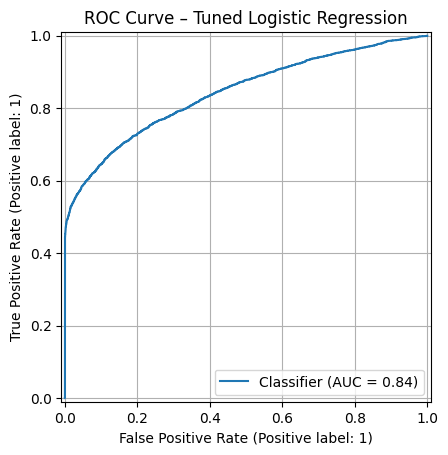

In [ ]:
# logistic regression model 1
# ============================
# Feature groups
# ============================

cat_features = [
    "loan_limit", "Gender", "approv_in_adv", "loan_type", "loan_purpose",
    "Credit_Worthiness", "open_credit", "business_or_commercial",
    "Neg_ammortization", "interest_only", "lump_sum_payment",
    "construction_type", "occupancy_type", "Secured_by", "total_units",
    "credit_type", "co-applicant_credit_type", "age",
    "submission_of_application", "Region", "Security_Type"
]

num_features = [
    "loan_amount", "term", "property_value", "income",
    "Credit_Score", "LTV", "dtir1"
]

flag_features = [
    "dtir1_missing",
    "property_value_missing",
    "LTV_missing"
]


# ============================
# Preprocessor
# ============================

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=True), cat_features),
        ("flag", "passthrough", flag_features)
    ]
)


# ============================
# Optuna objective
# ============================

def objective(trial):

    C = trial.suggest_float("C", 1e-4, 1e2, log=True)

    clf = LogisticRegression(
        C=C,
        penalty="l2",
        solver="lbfgs",
        class_weight="balanced",
        max_iter=3000,
        tol=1e-4
    )

    pipeline = Pipeline(
        steps=[
            ("preprocess", preprocessor),
            ("clf", clf)
        ]
    )

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    f1 = cross_val_score(
        pipeline,
        X_train,
        y_train,
        cv=cv,
        scoring="f1",
        n_jobs=-1
    ).mean()

    return f1


# ============================
# Run tuning (20 min limit)
# ============================

study = optuna.create_study(direction="maximize")

study.optimize(
    objective,
    n_trials=200,
    timeout=1200,
    show_progress_bar=True
)


# ============================
# Best parameters
# ============================

print("Best F1 (CV):", study.best_value)
print("Best params:", study.best_params)


# ============================
# Train final model
# ============================

best_params = study.best_params

final_model = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("clf", LogisticRegression(
            C=best_params["C"],      # only tuned parameter
            penalty="l2",            # fixed
            solver="lbfgs",          # fixed
            class_weight="balanced",
            max_iter=3000,           # fixed recommended value
            tol=1e-4
        ))
    ]
)

final_model.fit(X_train, y_train)


# ============================
# Evaluate on test set
# ============================

y_pred = final_model.predict(X_test)
y_proba = final_model.predict_proba(X_test)[:, 1]

f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
cm = confusion_matrix(y_test, y_pred)

print("\n===== TEST SET PERFORMANCE =====")
print(f"F1 Score     : {f1:.4f}")
print(f"Recall       : {recall:.4f}")
print(f"Accuracy     : {accuracy:.4f}")
print(f"ROC AUC      : {roc_auc:.4f}")
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


# ============================
# ROC Curve
# ============================

plt.figure(figsize=(6, 6))
RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("ROC Curve – Tuned Logistic Regression")
plt.grid(True)
plt.show()


In [9]:
# Outlier flags
outlier_flags = [
    "loan_amount_iqr_outlier",
    "LTV_iqr_outlier",
    "dtir1_iqr_outlier",
    "income_iqr_outlier",
    "property_value_iqr_outlier",
    "Credit_Score_iqr_outlier"
]


[I 2026-01-13 17:39:41,009] A new study created in memory with name: no-name-578cae00-6373-468e-9805-543f8d96b771
Best trial: 0. Best value: 0.648941:   0%|          | 1/200 [00:07<26:24,  7.96s/it, 7.96/1200 seconds]

[I 2026-01-13 17:39:48,972] Trial 0 finished with value: 0.6489405376724393 and parameters: {'C': 1.6571871772641906}. Best is trial 0 with value: 0.6489405376724393.


Best trial: 1. Best value: 0.649069:   1%|          | 2/200 [00:14<23:34,  7.14s/it, 14.53/1200 seconds]

[I 2026-01-13 17:39:55,540] Trial 1 finished with value: 0.6490689147337529 and parameters: {'C': 0.10703196217397462}. Best is trial 1 with value: 0.6490689147337529.


Best trial: 2. Best value: 0.649286:   2%|▏         | 3/200 [00:19<20:15,  6.17s/it, 19.54/1200 seconds]

[I 2026-01-13 17:40:00,549] Trial 2 finished with value: 0.6492864412702216 and parameters: {'C': 0.04447560890118926}. Best is trial 2 with value: 0.6492864412702216.


Best trial: 2. Best value: 0.649286:   2%|▏         | 4/200 [00:22<16:21,  5.01s/it, 22.77/1200 seconds]

[I 2026-01-13 17:40:03,780] Trial 3 finished with value: 0.6379497908701182 and parameters: {'C': 0.001037309420411755}. Best is trial 2 with value: 0.6492864412702216.


Best trial: 2. Best value: 0.649286:   2%|▎         | 5/200 [00:25<13:25,  4.13s/it, 25.35/1200 seconds]

[I 2026-01-13 17:40:06,357] Trial 4 finished with value: 0.6168912564335644 and parameters: {'C': 0.00022422234981739683}. Best is trial 2 with value: 0.6492864412702216.


Best trial: 2. Best value: 0.649286:   3%|▎         | 6/200 [00:30<14:27,  4.47s/it, 30.47/1200 seconds]

[I 2026-01-13 17:40:11,483] Trial 5 finished with value: 0.6489019791612526 and parameters: {'C': 0.8982793200599132}. Best is trial 2 with value: 0.6492864412702216.


Best trial: 2. Best value: 0.649286:   4%|▎         | 7/200 [00:34<13:58,  4.34s/it, 34.56/1200 seconds]

[I 2026-01-13 17:40:15,567] Trial 6 finished with value: 0.6453446918399522 and parameters: {'C': 0.00299964891457707}. Best is trial 2 with value: 0.6492864412702216.


Best trial: 2. Best value: 0.649286:   4%|▍         | 8/200 [00:39<14:48,  4.63s/it, 39.79/1200 seconds]

[I 2026-01-13 17:40:20,806] Trial 7 finished with value: 0.648828009281088 and parameters: {'C': 0.9827617244265258}. Best is trial 2 with value: 0.6492864412702216.


Best trial: 2. Best value: 0.649286:   4%|▍         | 9/200 [00:42<12:46,  4.01s/it, 42.45/1200 seconds]

[I 2026-01-13 17:40:23,461] Trial 8 finished with value: 0.6043044892024013 and parameters: {'C': 0.00010902985516791484}. Best is trial 2 with value: 0.6492864412702216.


Best trial: 2. Best value: 0.649286:   5%|▌         | 10/200 [00:47<13:14,  4.18s/it, 47.02/1200 seconds]

[I 2026-01-13 17:40:28,029] Trial 9 finished with value: 0.6492419533970042 and parameters: {'C': 0.038788569883347966}. Best is trial 2 with value: 0.6492864412702216.


Best trial: 2. Best value: 0.649286:   6%|▌         | 11/200 [00:52<14:36,  4.64s/it, 52.69/1200 seconds]

[I 2026-01-13 17:40:33,701] Trial 10 finished with value: 0.6490335425814588 and parameters: {'C': 21.880914947633215}. Best is trial 2 with value: 0.6492864412702216.


Best trial: 11. Best value: 0.649837:   6%|▌         | 12/200 [01:00<17:12,  5.49s/it, 60.13/1200 seconds]

[I 2026-01-13 17:40:41,138] Trial 11 finished with value: 0.6498371065714672 and parameters: {'C': 0.027354271344900843}. Best is trial 11 with value: 0.6498371065714672.


Best trial: 11. Best value: 0.649837:   6%|▋         | 13/200 [01:06<18:19,  5.88s/it, 66.89/1200 seconds]

[I 2026-01-13 17:40:47,906] Trial 12 finished with value: 0.6497861644393059 and parameters: {'C': 0.018233407026742268}. Best is trial 11 with value: 0.6498371065714672.


Best trial: 11. Best value: 0.649837:   7%|▋         | 14/200 [01:12<17:41,  5.71s/it, 72.20/1200 seconds]

[I 2026-01-13 17:40:53,215] Trial 13 finished with value: 0.6478752463777452 and parameters: {'C': 0.006225176069843352}. Best is trial 11 with value: 0.6498371065714672.


Best trial: 11. Best value: 0.649837:   8%|▊         | 15/200 [01:17<17:38,  5.72s/it, 77.96/1200 seconds]

[I 2026-01-13 17:40:58,966] Trial 14 finished with value: 0.6491249970808355 and parameters: {'C': 0.012463778768303561}. Best is trial 11 with value: 0.6498371065714672.


Best trial: 11. Best value: 0.649837:   8%|▊         | 16/200 [01:23<17:14,  5.62s/it, 83.36/1200 seconds]

[I 2026-01-13 17:41:04,368] Trial 15 finished with value: 0.6487447922274303 and parameters: {'C': 0.282142351011738}. Best is trial 11 with value: 0.6498371065714672.


Best trial: 11. Best value: 0.649837:   8%|▊         | 17/200 [01:29<17:24,  5.71s/it, 89.26/1200 seconds]

[I 2026-01-13 17:41:10,272] Trial 16 finished with value: 0.6490363721610277 and parameters: {'C': 13.584605631047474}. Best is trial 11 with value: 0.6498371065714672.


Best trial: 11. Best value: 0.649837:   9%|▉         | 18/200 [01:32<15:12,  5.02s/it, 92.67/1200 seconds]

[I 2026-01-13 17:41:13,678] Trial 17 finished with value: 0.6395393972721243 and parameters: {'C': 0.0012540083983249037}. Best is trial 11 with value: 0.6498371065714672.


Best trial: 11. Best value: 0.649837:  10%|▉         | 19/200 [01:37<15:06,  5.01s/it, 97.66/1200 seconds]

[I 2026-01-13 17:41:18,670] Trial 18 finished with value: 0.6489472126604535 and parameters: {'C': 0.2196575222187959}. Best is trial 11 with value: 0.6498371065714672.


Best trial: 11. Best value: 0.649837:  10%|█         | 20/200 [01:44<16:17,  5.43s/it, 104.08/1200 seconds]

[I 2026-01-13 17:41:25,088] Trial 19 finished with value: 0.6494874482228594 and parameters: {'C': 0.017408983837421097}. Best is trial 11 with value: 0.6498371065714672.


Best trial: 11. Best value: 0.649837:  10%|█         | 21/200 [01:49<16:23,  5.50s/it, 109.72/1200 seconds]

[I 2026-01-13 17:41:30,730] Trial 20 finished with value: 0.6489002622357237 and parameters: {'C': 5.026818714370873}. Best is trial 11 with value: 0.6498371065714672.


Best trial: 11. Best value: 0.649837:  11%|█         | 22/200 [01:56<17:32,  5.91s/it, 116.61/1200 seconds]

[I 2026-01-13 17:41:37,618] Trial 21 finished with value: 0.6497492115299989 and parameters: {'C': 0.02060795725498604}. Best is trial 11 with value: 0.6498371065714672.


Best trial: 11. Best value: 0.649837:  12%|█▏        | 23/200 [02:01<16:19,  5.53s/it, 121.26/1200 seconds]

[I 2026-01-13 17:41:42,268] Trial 22 finished with value: 0.6494419350002874 and parameters: {'C': 0.03764763027246274}. Best is trial 11 with value: 0.6498371065714672.


Best trial: 11. Best value: 0.649837:  12%|█▏        | 24/200 [02:05<14:51,  5.07s/it, 125.23/1200 seconds]

[I 2026-01-13 17:41:46,245] Trial 23 finished with value: 0.6448996811384735 and parameters: {'C': 0.0027819073209904275}. Best is trial 11 with value: 0.6498371065714672.


Best trial: 11. Best value: 0.649837:  12%|█▎        | 25/200 [02:10<15:22,  5.27s/it, 130.98/1200 seconds]

[I 2026-01-13 17:41:51,990] Trial 24 finished with value: 0.6485939762297662 and parameters: {'C': 0.009565865319648696}. Best is trial 11 with value: 0.6498371065714672.


Best trial: 11. Best value: 0.649837:  13%|█▎        | 26/200 [02:16<15:26,  5.32s/it, 136.43/1200 seconds]

[I 2026-01-13 17:41:57,437] Trial 25 finished with value: 0.6489550269628447 and parameters: {'C': 0.19870773789846988}. Best is trial 11 with value: 0.6498371065714672.


Best trial: 11. Best value: 0.649837:  14%|█▎        | 27/200 [02:19<13:06,  4.55s/it, 139.16/1200 seconds]

[I 2026-01-13 17:42:00,169] Trial 26 finished with value: 0.6295747118639468 and parameters: {'C': 0.0004449726935608474}. Best is trial 11 with value: 0.6498371065714672.


Best trial: 11. Best value: 0.649837:  14%|█▍        | 28/200 [02:24<13:51,  4.83s/it, 144.66/1200 seconds]

[I 2026-01-13 17:42:05,667] Trial 27 finished with value: 0.6490918911988967 and parameters: {'C': 96.00984209665704}. Best is trial 11 with value: 0.6498371065714672.


Best trial: 11. Best value: 0.649837:  14%|█▍        | 29/200 [02:29<13:28,  4.73s/it, 149.14/1200 seconds]

[I 2026-01-13 17:42:10,155] Trial 28 finished with value: 0.6471645878341951 and parameters: {'C': 0.004593815398915625}. Best is trial 11 with value: 0.6498371065714672.


Best trial: 11. Best value: 0.649837:  15%|█▌        | 30/200 [02:35<14:59,  5.29s/it, 155.74/1200 seconds]

[I 2026-01-13 17:42:16,753] Trial 29 finished with value: 0.6494856096035866 and parameters: {'C': 0.021656585847363203}. Best is trial 11 with value: 0.6498371065714672.


Best trial: 11. Best value: 0.649837:  16%|█▌        | 31/200 [02:40<14:21,  5.10s/it, 160.39/1200 seconds]

[I 2026-01-13 17:42:21,402] Trial 30 finished with value: 0.6491532437752559 and parameters: {'C': 0.06690350778753526}. Best is trial 11 with value: 0.6498371065714672.


Best trial: 11. Best value: 0.649837:  16%|█▌        | 32/200 [02:46<15:16,  5.46s/it, 166.68/1200 seconds]

[I 2026-01-13 17:42:27,692] Trial 31 finished with value: 0.6492337616933114 and parameters: {'C': 0.015666918986437517}. Best is trial 11 with value: 0.6498371065714672.


Best trial: 11. Best value: 0.649837:  16%|█▋        | 33/200 [02:51<14:44,  5.30s/it, 171.61/1200 seconds]

[I 2026-01-13 17:42:32,622] Trial 32 finished with value: 0.6487924506217384 and parameters: {'C': 0.0930345157354806}. Best is trial 11 with value: 0.6498371065714672.


Best trial: 11. Best value: 0.649837:  17%|█▋        | 34/200 [02:58<15:55,  5.75s/it, 178.43/1200 seconds]

[I 2026-01-13 17:42:39,442] Trial 33 finished with value: 0.6498167840215541 and parameters: {'C': 0.02239895470875399}. Best is trial 11 with value: 0.6498371065714672.


Best trial: 11. Best value: 0.649837:  18%|█▊        | 35/200 [03:03<15:09,  5.51s/it, 183.38/1200 seconds]

[I 2026-01-13 17:42:44,389] Trial 34 finished with value: 0.6487267294059744 and parameters: {'C': 0.4597637801007923}. Best is trial 11 with value: 0.6498371065714672.


Best trial: 11. Best value: 0.649837:  18%|█▊        | 36/200 [03:08<14:57,  5.48s/it, 188.77/1200 seconds]

[I 2026-01-13 17:42:49,778] Trial 35 finished with value: 0.649067934126969 and parameters: {'C': 0.11015967480081988}. Best is trial 11 with value: 0.6498371065714672.


Best trial: 11. Best value: 0.649837:  18%|█▊        | 37/200 [03:12<13:29,  4.97s/it, 192.55/1200 seconds]

[I 2026-01-13 17:42:53,564] Trial 36 finished with value: 0.6423507065123336 and parameters: {'C': 0.001967189212862956}. Best is trial 11 with value: 0.6498371065714672.


Best trial: 11. Best value: 0.649837:  19%|█▉        | 38/200 [03:18<13:55,  5.16s/it, 198.16/1200 seconds]

[I 2026-01-13 17:42:59,172] Trial 37 finished with value: 0.6491720278745866 and parameters: {'C': 0.03420388117927071}. Best is trial 11 with value: 0.6498371065714672.


Best trial: 11. Best value: 0.649837:  20%|█▉        | 39/200 [03:23<13:58,  5.21s/it, 203.49/1200 seconds]

[I 2026-01-13 17:43:04,500] Trial 38 finished with value: 0.6480711671236266 and parameters: {'C': 0.007163345446524806}. Best is trial 11 with value: 0.6498371065714672.


Best trial: 11. Best value: 0.649837:  20%|██        | 40/200 [03:26<12:16,  4.60s/it, 206.67/1200 seconds]

[I 2026-01-13 17:43:07,686] Trial 39 finished with value: 0.6376815728857386 and parameters: {'C': 0.0009708106938102172}. Best is trial 11 with value: 0.6498371065714672.


Best trial: 11. Best value: 0.649837:  20%|██        | 41/200 [03:31<12:31,  4.73s/it, 211.70/1200 seconds]

[I 2026-01-13 17:43:12,706] Trial 40 finished with value: 0.6488483044227719 and parameters: {'C': 0.09081464985540973}. Best is trial 11 with value: 0.6498371065714672.


Best trial: 11. Best value: 0.649837:  21%|██        | 42/200 [03:38<14:02,  5.33s/it, 218.43/1200 seconds]

[I 2026-01-13 17:43:19,438] Trial 41 finished with value: 0.6496801306247659 and parameters: {'C': 0.019251985697037836}. Best is trial 11 with value: 0.6498371065714672.


Best trial: 42. Best value: 0.649852:  22%|██▏       | 43/200 [03:45<15:41,  6.00s/it, 225.98/1200 seconds]

[I 2026-01-13 17:43:26,990] Trial 42 finished with value: 0.6498521468648792 and parameters: {'C': 0.023292140221431272}. Best is trial 42 with value: 0.6498521468648792.


Best trial: 42. Best value: 0.649852:  22%|██▏       | 44/200 [03:50<14:26,  5.55s/it, 230.50/1200 seconds]

[I 2026-01-13 17:43:31,510] Trial 43 finished with value: 0.6492683758223339 and parameters: {'C': 0.05185112495838431}. Best is trial 42 with value: 0.6498521468648792.


Best trial: 42. Best value: 0.649852:  22%|██▎       | 45/200 [03:54<13:22,  5.17s/it, 234.79/1200 seconds]

[I 2026-01-13 17:43:35,802] Trial 44 finished with value: 0.6461532657892104 and parameters: {'C': 0.0034842999030253647}. Best is trial 42 with value: 0.6498521468648792.


Best trial: 42. Best value: 0.649852:  23%|██▎       | 46/200 [04:00<13:24,  5.23s/it, 240.14/1200 seconds]

[I 2026-01-13 17:43:41,149] Trial 45 finished with value: 0.6491763316123758 and parameters: {'C': 0.03427482574988338}. Best is trial 42 with value: 0.6498521468648792.


Best trial: 42. Best value: 0.649852:  24%|██▎       | 47/200 [04:05<13:29,  5.29s/it, 245.57/1200 seconds]

[I 2026-01-13 17:43:46,582] Trial 46 finished with value: 0.6487610558551244 and parameters: {'C': 0.009531311305449609}. Best is trial 42 with value: 0.6498521468648792.


Best trial: 42. Best value: 0.649852:  24%|██▍       | 48/200 [04:10<13:26,  5.31s/it, 250.92/1200 seconds]

[I 2026-01-13 17:43:51,933] Trial 47 finished with value: 0.6489902960361167 and parameters: {'C': 0.5399904862064704}. Best is trial 42 with value: 0.6498521468648792.


Best trial: 42. Best value: 0.649852:  24%|██▍       | 49/200 [04:16<13:23,  5.32s/it, 256.28/1200 seconds]

[I 2026-01-13 17:43:57,293] Trial 48 finished with value: 0.6487670876737839 and parameters: {'C': 0.15820191425555455}. Best is trial 42 with value: 0.6498521468648792.


Best trial: 42. Best value: 0.649852:  25%|██▌       | 50/200 [04:21<12:59,  5.20s/it, 261.18/1200 seconds]

[I 2026-01-13 17:44:02,190] Trial 49 finished with value: 0.6477301562212503 and parameters: {'C': 0.005819633451282293}. Best is trial 42 with value: 0.6498521468648792.


Best trial: 42. Best value: 0.649852:  26%|██▌       | 51/200 [04:26<13:11,  5.31s/it, 266.76/1200 seconds]

[I 2026-01-13 17:44:07,772] Trial 50 finished with value: 0.6490079359920353 and parameters: {'C': 1.5104446057976073}. Best is trial 42 with value: 0.6498521468648792.


Best trial: 42. Best value: 0.649852:  26%|██▌       | 52/200 [04:34<14:42,  5.96s/it, 274.24/1200 seconds]

[I 2026-01-13 17:44:15,254] Trial 51 finished with value: 0.6498298008327866 and parameters: {'C': 0.02283627405649794}. Best is trial 42 with value: 0.6498521468648792.


Best trial: 42. Best value: 0.649852:  26%|██▋       | 53/200 [04:41<15:18,  6.25s/it, 281.17/1200 seconds]

[I 2026-01-13 17:44:22,177] Trial 52 finished with value: 0.649395326257417 and parameters: {'C': 0.03339925223103041}. Best is trial 42 with value: 0.6498521468648792.


Best trial: 53. Best value: 0.650048:  27%|██▋       | 54/200 [04:48<15:54,  6.53s/it, 288.36/1200 seconds]

[I 2026-01-13 17:44:29,375] Trial 53 finished with value: 0.6500476279735967 and parameters: {'C': 0.02398822745732435}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  28%|██▊       | 55/200 [04:54<15:31,  6.42s/it, 294.53/1200 seconds]

[I 2026-01-13 17:44:35,543] Trial 54 finished with value: 0.6492045393447982 and parameters: {'C': 0.012980851864231263}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  28%|██▊       | 56/200 [04:59<14:21,  5.98s/it, 299.49/1200 seconds]

[I 2026-01-13 17:44:40,501] Trial 55 finished with value: 0.6493002217750138 and parameters: {'C': 0.0625064242591137}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  28%|██▊       | 57/200 [05:06<15:10,  6.37s/it, 306.74/1200 seconds]

[I 2026-01-13 17:44:47,755] Trial 56 finished with value: 0.6497038398735383 and parameters: {'C': 0.023265221615313636}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  29%|██▉       | 58/200 [05:10<13:23,  5.66s/it, 310.75/1200 seconds]

[I 2026-01-13 17:44:51,760] Trial 57 finished with value: 0.6417492026510836 and parameters: {'C': 0.001822109282346856}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  30%|██▉       | 59/200 [05:16<13:27,  5.73s/it, 316.65/1200 seconds]

[I 2026-01-13 17:44:57,657] Trial 58 finished with value: 0.6490135527556689 and parameters: {'C': 0.009804566622949816}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  30%|███       | 60/200 [05:21<12:43,  5.45s/it, 321.46/1200 seconds]

[I 2026-01-13 17:45:02,471] Trial 59 finished with value: 0.6472851572599858 and parameters: {'C': 0.00488359731315085}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  30%|███       | 61/200 [05:26<12:22,  5.35s/it, 326.55/1200 seconds]

[I 2026-01-13 17:45:07,560] Trial 60 finished with value: 0.6488131372148266 and parameters: {'C': 0.1548201980823394}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  31%|███       | 62/200 [05:32<12:57,  5.63s/it, 332.85/1200 seconds]

[I 2026-01-13 17:45:13,860] Trial 61 finished with value: 0.6497449104656362 and parameters: {'C': 0.024051932486509255}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  32%|███▏      | 63/200 [05:37<12:25,  5.44s/it, 337.84/1200 seconds]

[I 2026-01-13 17:45:18,848] Trial 62 finished with value: 0.6490659949304695 and parameters: {'C': 0.056518854849387457}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  32%|███▏      | 64/200 [05:44<13:04,  5.77s/it, 344.37/1200 seconds]

[I 2026-01-13 17:45:25,378] Trial 63 finished with value: 0.6492109954800311 and parameters: {'C': 0.0132297859813321}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  32%|███▎      | 65/200 [05:49<12:51,  5.72s/it, 349.97/1200 seconds]

[I 2026-01-13 17:45:30,982] Trial 64 finished with value: 0.6486560817005433 and parameters: {'C': 0.008285176052129417}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  33%|███▎      | 66/200 [05:56<12:59,  5.82s/it, 356.02/1200 seconds]

[I 2026-01-13 17:45:37,033] Trial 65 finished with value: 0.6496377758646817 and parameters: {'C': 0.0274566971948302}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  34%|███▎      | 67/200 [06:01<12:31,  5.65s/it, 361.28/1200 seconds]

[I 2026-01-13 17:45:42,294] Trial 66 finished with value: 0.6490118347107674 and parameters: {'C': 0.09657671744240959}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  34%|███▍      | 68/200 [06:06<11:50,  5.38s/it, 366.05/1200 seconds]

[I 2026-01-13 17:45:47,057] Trial 67 finished with value: 0.6488764353116943 and parameters: {'C': 0.045939154234339266}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  34%|███▍      | 69/200 [06:12<12:19,  5.65s/it, 372.30/1200 seconds]

[I 2026-01-13 17:45:53,312] Trial 68 finished with value: 0.6491984776261168 and parameters: {'C': 0.013522639858054184}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  35%|███▌      | 70/200 [06:16<11:31,  5.32s/it, 376.87/1200 seconds]

[I 2026-01-13 17:45:57,883] Trial 69 finished with value: 0.6455854963727992 and parameters: {'C': 0.0032191120363605575}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  36%|███▌      | 71/200 [06:23<12:33,  5.84s/it, 383.93/1200 seconds]

[I 2026-01-13 17:46:04,938] Trial 70 finished with value: 0.6493681728677337 and parameters: {'C': 0.018607800864729428}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  36%|███▌      | 72/200 [06:30<13:10,  6.18s/it, 390.89/1200 seconds]

[I 2026-01-13 17:46:11,900] Trial 71 finished with value: 0.6494975573932412 and parameters: {'C': 0.024722202395879654}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  36%|███▋      | 73/200 [06:35<12:19,  5.82s/it, 395.89/1200 seconds]

[I 2026-01-13 17:46:16,896] Trial 72 finished with value: 0.6491564904830653 and parameters: {'C': 0.06781753094362712}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  37%|███▋      | 74/200 [06:40<11:28,  5.47s/it, 400.52/1200 seconds]

[I 2026-01-13 17:46:21,531] Trial 73 finished with value: 0.6493204905176618 and parameters: {'C': 0.041463297770567384}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  38%|███▊      | 75/200 [06:48<12:41,  6.09s/it, 408.07/1200 seconds]

[I 2026-01-13 17:46:29,078] Trial 74 finished with value: 0.6494546172749708 and parameters: {'C': 0.017954905735741683}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  38%|███▊      | 76/200 [06:53<12:17,  5.95s/it, 413.67/1200 seconds]

[I 2026-01-13 17:46:34,685] Trial 75 finished with value: 0.6481714809409772 and parameters: {'C': 0.0072498299980406225}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  38%|███▊      | 77/200 [06:58<11:47,  5.75s/it, 418.97/1200 seconds]

[I 2026-01-13 17:46:39,980] Trial 76 finished with value: 0.6488104459702837 and parameters: {'C': 0.36793044097490885}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  39%|███▉      | 78/200 [07:05<11:59,  5.90s/it, 425.21/1200 seconds]

[I 2026-01-13 17:46:46,225] Trial 77 finished with value: 0.6498705111771941 and parameters: {'C': 0.024065868992837743}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  40%|███▉      | 79/200 [07:10<11:31,  5.71s/it, 430.49/1200 seconds]

[I 2026-01-13 17:46:51,502] Trial 78 finished with value: 0.6489023649680605 and parameters: {'C': 0.13243409173410847}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  40%|████      | 80/200 [07:15<11:01,  5.51s/it, 435.53/1200 seconds]

[I 2026-01-13 17:46:56,537] Trial 79 finished with value: 0.6490041260589788 and parameters: {'C': 0.07235762798339834}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  40%|████      | 81/200 [07:22<11:32,  5.82s/it, 442.06/1200 seconds]

[I 2026-01-13 17:47:03,073] Trial 80 finished with value: 0.6493000083829852 and parameters: {'C': 0.031425491162635724}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  41%|████      | 82/200 [07:29<12:12,  6.21s/it, 449.17/1200 seconds]

[I 2026-01-13 17:47:10,184] Trial 81 finished with value: 0.6497920537215766 and parameters: {'C': 0.023457754933790525}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  42%|████▏     | 83/200 [07:35<11:57,  6.13s/it, 455.13/1200 seconds]

[I 2026-01-13 17:47:16,145] Trial 82 finished with value: 0.6490118326471498 and parameters: {'C': 0.012604948840404001}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  42%|████▏     | 84/200 [07:39<10:56,  5.66s/it, 459.70/1200 seconds]

[I 2026-01-13 17:47:20,709] Trial 83 finished with value: 0.6491438651466539 and parameters: {'C': 0.045494517823778086}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  42%|████▎     | 85/200 [07:45<11:03,  5.77s/it, 465.72/1200 seconds]

[I 2026-01-13 17:47:26,728] Trial 84 finished with value: 0.6488253075946048 and parameters: {'C': 0.009871700687351867}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  43%|████▎     | 86/200 [07:50<10:19,  5.43s/it, 470.37/1200 seconds]

[I 2026-01-13 17:47:31,378] Trial 85 finished with value: 0.6470951165257797 and parameters: {'C': 0.004278497090134723}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  44%|████▎     | 87/200 [07:57<11:10,  5.93s/it, 477.46/1200 seconds]

[I 2026-01-13 17:47:38,469] Trial 86 finished with value: 0.649263337854711 and parameters: {'C': 0.017111593293511165}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  44%|████▍     | 88/200 [08:02<10:39,  5.71s/it, 482.65/1200 seconds]

[I 2026-01-13 17:47:43,663] Trial 87 finished with value: 0.6478468358299343 and parameters: {'C': 0.006048581665354985}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  44%|████▍     | 89/200 [08:08<10:23,  5.62s/it, 488.06/1200 seconds]

[I 2026-01-13 17:47:49,066] Trial 88 finished with value: 0.6490676201612583 and parameters: {'C': 0.20827619160449803}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  45%|████▌     | 90/200 [08:14<10:50,  5.91s/it, 494.66/1200 seconds]

[I 2026-01-13 17:47:55,673] Trial 89 finished with value: 0.6492597205068813 and parameters: {'C': 0.028878280692817344}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  46%|████▌     | 91/200 [08:19<10:09,  5.59s/it, 499.51/1200 seconds]

[I 2026-01-13 17:48:00,520] Trial 90 finished with value: 0.6490536594171915 and parameters: {'C': 0.0787315533409598}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  46%|████▌     | 92/200 [08:26<10:50,  6.02s/it, 506.54/1200 seconds]

[I 2026-01-13 17:48:07,549] Trial 91 finished with value: 0.6497307778385011 and parameters: {'C': 0.025347295065823332}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  46%|████▋     | 93/200 [08:32<10:54,  6.11s/it, 512.86/1200 seconds]

[I 2026-01-13 17:48:13,866] Trial 92 finished with value: 0.6498062628463707 and parameters: {'C': 0.02225407523406868}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  47%|████▋     | 94/200 [08:37<10:07,  5.73s/it, 517.71/1200 seconds]

[I 2026-01-13 17:48:18,716] Trial 93 finished with value: 0.6491510914763825 and parameters: {'C': 0.039655228969170966}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  48%|████▊     | 95/200 [08:44<10:37,  6.07s/it, 524.57/1200 seconds]

[I 2026-01-13 17:48:25,578] Trial 94 finished with value: 0.649662314673388 and parameters: {'C': 0.019227759424503606}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  48%|████▊     | 96/200 [08:50<10:28,  6.04s/it, 530.54/1200 seconds]

[I 2026-01-13 17:48:31,547] Trial 95 finished with value: 0.6489313851363374 and parameters: {'C': 0.009933579577799057}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  48%|████▊     | 97/200 [08:54<09:15,  5.39s/it, 534.40/1200 seconds]

[I 2026-01-13 17:48:35,414] Trial 96 finished with value: 0.6434094247905594 and parameters: {'C': 0.0022077308574002226}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  49%|████▉     | 98/200 [08:59<08:53,  5.23s/it, 539.26/1200 seconds]

[I 2026-01-13 17:48:40,267] Trial 97 finished with value: 0.6490653231965327 and parameters: {'C': 0.0566311515077826}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  50%|████▉     | 99/200 [09:05<09:19,  5.54s/it, 545.54/1200 seconds]

[I 2026-01-13 17:48:46,547] Trial 98 finished with value: 0.6492758613694779 and parameters: {'C': 0.014035883294915534}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  50%|█████     | 100/200 [09:10<09:02,  5.42s/it, 550.68/1200 seconds]

[I 2026-01-13 17:48:51,692] Trial 99 finished with value: 0.6490940215998147 and parameters: {'C': 0.10698193341331927}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  50%|█████     | 101/200 [09:15<08:31,  5.17s/it, 555.24/1200 seconds]

[I 2026-01-13 17:48:56,254] Trial 100 finished with value: 0.6495263301411388 and parameters: {'C': 0.03774238026853639}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  51%|█████     | 102/200 [09:22<09:17,  5.69s/it, 562.15/1200 seconds]

[I 2026-01-13 17:49:03,162] Trial 101 finished with value: 0.649648018232668 and parameters: {'C': 0.023227078958009583}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  52%|█████▏    | 103/200 [09:27<09:11,  5.69s/it, 567.84/1200 seconds]

[I 2026-01-13 17:49:08,846] Trial 102 finished with value: 0.6495299279742024 and parameters: {'C': 0.028568205336937706}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  52%|█████▏    | 104/200 [09:33<09:12,  5.76s/it, 573.76/1200 seconds]

[I 2026-01-13 17:49:14,768] Trial 103 finished with value: 0.6488706452726121 and parameters: {'C': 0.010538109633361695}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  52%|█████▎    | 105/200 [09:38<08:52,  5.60s/it, 579.00/1200 seconds]

[I 2026-01-13 17:49:20,009] Trial 104 finished with value: 0.6481251778258617 and parameters: {'C': 0.00728606950971093}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  53%|█████▎    | 106/200 [09:46<09:30,  6.07s/it, 586.15/1200 seconds]

[I 2026-01-13 17:49:27,162] Trial 105 finished with value: 0.6495642236370134 and parameters: {'C': 0.017221128210589715}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  54%|█████▎    | 107/200 [09:50<08:50,  5.70s/it, 591.00/1200 seconds]

[I 2026-01-13 17:49:32,009] Trial 106 finished with value: 0.649262066797503 and parameters: {'C': 0.050750012059142896}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  54%|█████▍    | 108/200 [09:58<09:23,  6.12s/it, 598.10/1200 seconds]

[I 2026-01-13 17:49:39,107] Trial 107 finished with value: 0.6499212944330263 and parameters: {'C': 0.02084765506102056}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  55%|█████▍    | 109/200 [10:02<08:38,  5.69s/it, 602.79/1200 seconds]

[I 2026-01-13 17:49:43,803] Trial 108 finished with value: 0.6471006129250507 and parameters: {'C': 0.004418144999574154}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  55%|█████▌    | 110/200 [10:09<08:47,  5.86s/it, 609.06/1200 seconds]

[I 2026-01-13 17:49:50,069] Trial 109 finished with value: 0.6493154662668196 and parameters: {'C': 0.01367468727408445}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  56%|█████▌    | 111/200 [10:16<09:15,  6.24s/it, 616.17/1200 seconds]

[I 2026-01-13 17:49:57,181] Trial 110 finished with value: 0.6496390469739596 and parameters: {'C': 0.020791050336319488}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  56%|█████▌    | 112/200 [10:20<08:22,  5.71s/it, 620.65/1200 seconds]

[I 2026-01-13 17:50:01,661] Trial 111 finished with value: 0.6493347879090001 and parameters: {'C': 0.03021372899878791}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  56%|█████▋    | 113/200 [10:27<08:47,  6.07s/it, 627.54/1200 seconds]

[I 2026-01-13 17:50:08,555] Trial 112 finished with value: 0.649865111436799 and parameters: {'C': 0.020636316868758296}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  57%|█████▋    | 114/200 [10:31<07:59,  5.58s/it, 631.98/1200 seconds]

[I 2026-01-13 17:50:12,990] Trial 113 finished with value: 0.6490692396495847 and parameters: {'C': 0.03821297911192023}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  57%|█████▊    | 115/200 [10:38<08:09,  5.76s/it, 638.16/1200 seconds]

[I 2026-01-13 17:50:19,173] Trial 114 finished with value: 0.6495104440735018 and parameters: {'C': 0.014765979919657137}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  58%|█████▊    | 116/200 [10:43<07:56,  5.67s/it, 643.64/1200 seconds]

[I 2026-01-13 17:50:24,648] Trial 115 finished with value: 0.6485791137221069 and parameters: {'C': 0.008075571556220134}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  58%|█████▊    | 117/200 [10:49<07:56,  5.74s/it, 649.53/1200 seconds]

[I 2026-01-13 17:50:30,537] Trial 116 finished with value: 0.6487700941679991 and parameters: {'C': 0.010748375971367132}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  59%|█████▉    | 118/200 [10:55<07:47,  5.70s/it, 655.15/1200 seconds]

[I 2026-01-13 17:50:36,159] Trial 117 finished with value: 0.6492057274849019 and parameters: {'C': 8.157625375392824}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  60%|█████▉    | 119/200 [11:00<07:23,  5.47s/it, 660.09/1200 seconds]

[I 2026-01-13 17:50:41,099] Trial 118 finished with value: 0.6493256810165292 and parameters: {'C': 0.05444287806600205}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  60%|██████    | 120/200 [11:06<07:50,  5.88s/it, 666.93/1200 seconds]

[I 2026-01-13 17:50:47,940] Trial 119 finished with value: 0.6497666065852501 and parameters: {'C': 0.022636282258971796}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  60%|██████    | 121/200 [11:12<07:30,  5.70s/it, 672.21/1200 seconds]

[I 2026-01-13 17:50:53,224] Trial 120 finished with value: 0.6477776929562549 and parameters: {'C': 0.0059226302244404045}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  61%|██████    | 122/200 [11:19<07:53,  6.07s/it, 679.14/1200 seconds]

[I 2026-01-13 17:51:00,147] Trial 121 finished with value: 0.6498124289550219 and parameters: {'C': 0.020007652661737253}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  62%|██████▏   | 123/200 [11:25<08:01,  6.26s/it, 685.84/1200 seconds]

[I 2026-01-13 17:51:06,846] Trial 122 finished with value: 0.6495570021350392 and parameters: {'C': 0.02183311479990489}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  62%|██████▏   | 124/200 [11:30<07:17,  5.75s/it, 690.40/1200 seconds]

[I 2026-01-13 17:51:11,415] Trial 123 finished with value: 0.6493057255909117 and parameters: {'C': 0.03178769413455808}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  62%|██████▎   | 125/200 [11:36<07:28,  5.99s/it, 696.93/1200 seconds]

[I 2026-01-13 17:51:17,945] Trial 124 finished with value: 0.6493479013103146 and parameters: {'C': 0.01718107306556835}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  63%|██████▎   | 126/200 [11:42<07:06,  5.76s/it, 702.18/1200 seconds]

[I 2026-01-13 17:51:23,187] Trial 125 finished with value: 0.6491799392905705 and parameters: {'C': 0.07603710731314747}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  64%|██████▎   | 127/200 [11:46<06:37,  5.44s/it, 706.88/1200 seconds]

[I 2026-01-13 17:51:27,891] Trial 126 finished with value: 0.6491479129014345 and parameters: {'C': 0.04249245842709478}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  64%|██████▍   | 128/200 [11:54<07:19,  6.10s/it, 714.50/1200 seconds]

[I 2026-01-13 17:51:35,512] Trial 127 finished with value: 0.6498982339573167 and parameters: {'C': 0.024946163105958975}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  64%|██████▍   | 129/200 [12:01<07:22,  6.23s/it, 721.03/1200 seconds]

[I 2026-01-13 17:51:42,043] Trial 128 finished with value: 0.6490188794235008 and parameters: {'C': 0.011775698484131503}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  65%|██████▌   | 130/200 [12:07<07:21,  6.31s/it, 727.52/1200 seconds]

[I 2026-01-13 17:51:48,530] Trial 129 finished with value: 0.6494465690239071 and parameters: {'C': 0.029984730991076722}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  66%|██████▌   | 131/200 [12:14<07:19,  6.37s/it, 734.03/1200 seconds]

[I 2026-01-13 17:51:55,040] Trial 130 finished with value: 0.6496016316723493 and parameters: {'C': 0.016325060201193564}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  66%|██████▌   | 132/200 [12:21<07:29,  6.61s/it, 741.21/1200 seconds]

[I 2026-01-13 17:52:02,222] Trial 131 finished with value: 0.6498664951327191 and parameters: {'C': 0.0234216456876098}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  66%|██████▋   | 133/200 [12:28<07:33,  6.77s/it, 748.35/1200 seconds]

[I 2026-01-13 17:52:09,358] Trial 132 finished with value: 0.6497162495493273 and parameters: {'C': 0.02498741371695273}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  67%|██████▋   | 134/200 [12:33<06:45,  6.15s/it, 753.05/1200 seconds]

[I 2026-01-13 17:52:14,059] Trial 133 finished with value: 0.6492974174090828 and parameters: {'C': 0.046244077998439596}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  68%|██████▊   | 135/200 [12:39<06:46,  6.25s/it, 759.54/1200 seconds]

[I 2026-01-13 17:52:20,554] Trial 134 finished with value: 0.6493574986649326 and parameters: {'C': 0.013907778647169695}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  68%|██████▊   | 136/200 [12:45<06:30,  6.09s/it, 765.27/1200 seconds]

[I 2026-01-13 17:52:26,277] Trial 135 finished with value: 0.6485388039106115 and parameters: {'C': 0.008917017957128907}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  68%|██████▊   | 137/200 [12:50<06:00,  5.72s/it, 770.13/1200 seconds]

[I 2026-01-13 17:52:31,139] Trial 136 finished with value: 0.6492998367436408 and parameters: {'C': 0.036113819698324647}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  69%|██████▉   | 138/200 [12:57<06:29,  6.29s/it, 777.73/1200 seconds]

[I 2026-01-13 17:52:38,744] Trial 137 finished with value: 0.6496199885473923 and parameters: {'C': 0.019715570545017855}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  70%|██████▉   | 139/200 [13:03<06:12,  6.11s/it, 783.44/1200 seconds]

[I 2026-01-13 17:52:44,447] Trial 138 finished with value: 0.6488565729525736 and parameters: {'C': 40.47882267362523}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  70%|███████   | 140/200 [13:08<05:42,  5.72s/it, 788.22/1200 seconds]

[I 2026-01-13 17:52:49,234] Trial 139 finished with value: 0.6491576971533692 and parameters: {'C': 0.05376260873370988}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  70%|███████   | 141/200 [13:14<05:51,  5.96s/it, 794.76/1200 seconds]

[I 2026-01-13 17:52:55,768] Trial 140 finished with value: 0.6496780414648645 and parameters: {'C': 0.02592852926079868}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  71%|███████   | 142/200 [13:21<06:05,  6.31s/it, 801.87/1200 seconds]

[I 2026-01-13 17:53:02,877] Trial 141 finished with value: 0.6497441567585014 and parameters: {'C': 0.020345561520570054}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  72%|███████▏  | 143/200 [13:28<05:57,  6.27s/it, 808.05/1200 seconds]

[I 2026-01-13 17:53:09,064] Trial 142 finished with value: 0.6488873337138842 and parameters: {'C': 0.01202000094189058}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  72%|███████▏  | 144/200 [13:34<05:49,  6.24s/it, 814.21/1200 seconds]

[I 2026-01-13 17:53:15,221] Trial 143 finished with value: 0.6496001993622027 and parameters: {'C': 0.024326141083612512}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  72%|███████▎  | 145/200 [13:39<05:34,  6.08s/it, 819.94/1200 seconds]

[I 2026-01-13 17:53:20,950] Trial 144 finished with value: 0.6494252222817926 and parameters: {'C': 0.03550593162893671}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  73%|███████▎  | 146/200 [13:46<05:33,  6.18s/it, 826.35/1200 seconds]

[I 2026-01-13 17:53:27,363] Trial 145 finished with value: 0.6493671872347256 and parameters: {'C': 0.016115348867127628}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  74%|███████▎  | 147/200 [13:53<05:40,  6.43s/it, 833.35/1200 seconds]

[I 2026-01-13 17:53:34,359] Trial 146 finished with value: 0.6496023253260629 and parameters: {'C': 0.021330812640361678}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  74%|███████▍  | 148/200 [13:58<05:15,  6.06s/it, 838.56/1200 seconds]

[I 2026-01-13 17:53:39,566] Trial 147 finished with value: 0.6491620691240259 and parameters: {'C': 0.06632102555719781}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  74%|███████▍  | 149/200 [14:04<05:08,  6.05s/it, 844.58/1200 seconds]

[I 2026-01-13 17:53:45,591] Trial 148 finished with value: 0.6492707205089252 and parameters: {'C': 0.034487123961385945}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  75%|███████▌  | 150/200 [14:10<04:53,  5.86s/it, 850.00/1200 seconds]

[I 2026-01-13 17:53:51,013] Trial 149 finished with value: 0.648305013058071 and parameters: {'C': 0.007137694189783803}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  76%|███████▌  | 151/200 [14:12<04:02,  4.94s/it, 852.79/1200 seconds]

[I 2026-01-13 17:53:53,805] Trial 150 finished with value: 0.6102479916486949 and parameters: {'C': 0.00015362629387983146}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  76%|███████▌  | 152/200 [14:19<04:26,  5.55s/it, 859.75/1200 seconds]

[I 2026-01-13 17:54:00,765] Trial 151 finished with value: 0.6495904228770911 and parameters: {'C': 0.025858451617623394}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  76%|███████▋  | 153/200 [14:26<04:33,  5.83s/it, 866.23/1200 seconds]

[I 2026-01-13 17:54:07,243] Trial 152 finished with value: 0.6495412491800245 and parameters: {'C': 0.01642581813343333}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  77%|███████▋  | 154/200 [14:32<04:35,  5.99s/it, 872.61/1200 seconds]

[I 2026-01-13 17:54:13,617] Trial 153 finished with value: 0.6487872281827244 and parameters: {'C': 0.011542722861432254}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  78%|███████▊  | 155/200 [14:39<04:43,  6.29s/it, 879.60/1200 seconds]

[I 2026-01-13 17:54:20,611] Trial 154 finished with value: 0.6497381797242711 and parameters: {'C': 0.01879256919338641}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  78%|███████▊  | 156/200 [14:44<04:15,  5.82s/it, 884.31/1200 seconds]

[I 2026-01-13 17:54:25,318] Trial 155 finished with value: 0.6490146145060658 and parameters: {'C': 0.04515812031635356}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  78%|███████▊  | 157/200 [14:51<04:22,  6.11s/it, 891.12/1200 seconds]

[I 2026-01-13 17:54:32,130] Trial 156 finished with value: 0.6497302897192074 and parameters: {'C': 0.027870180322741897}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  79%|███████▉  | 158/200 [14:58<04:26,  6.35s/it, 898.03/1200 seconds]

[I 2026-01-13 17:54:39,043] Trial 157 finished with value: 0.6492511985685578 and parameters: {'C': 0.01350425920666651}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  80%|███████▉  | 159/200 [15:04<04:15,  6.24s/it, 904.00/1200 seconds]

[I 2026-01-13 17:54:45,011] Trial 158 finished with value: 0.6488618511545821 and parameters: {'C': 0.010149216237172876}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  80%|████████  | 160/200 [15:11<04:19,  6.48s/it, 911.05/1200 seconds]

[I 2026-01-13 17:54:52,065] Trial 159 finished with value: 0.6497143071773613 and parameters: {'C': 0.021564132197027637}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  80%|████████  | 161/200 [15:15<03:51,  5.95s/it, 915.75/1200 seconds]

[I 2026-01-13 17:54:56,760] Trial 160 finished with value: 0.649134922103028 and parameters: {'C': 0.03861838305136818}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  81%|████████  | 162/200 [15:23<04:02,  6.38s/it, 923.14/1200 seconds]

[I 2026-01-13 17:55:04,149] Trial 161 finished with value: 0.6496734300761251 and parameters: {'C': 0.0254067939531407}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  82%|████████▏ | 163/200 [15:29<03:57,  6.42s/it, 929.66/1200 seconds]

[I 2026-01-13 17:55:10,669] Trial 162 finished with value: 0.6494297500546524 and parameters: {'C': 0.015361813756248968}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  82%|████████▏ | 164/200 [15:35<03:42,  6.19s/it, 935.30/1200 seconds]

[I 2026-01-13 17:55:16,307] Trial 163 finished with value: 0.6495060514564427 and parameters: {'C': 0.03212375162022337}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  82%|████████▎ | 165/200 [15:42<03:45,  6.45s/it, 942.37/1200 seconds]

[I 2026-01-13 17:55:23,384] Trial 164 finished with value: 0.6496312953519483 and parameters: {'C': 0.021954750719187385}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  83%|████████▎ | 166/200 [15:47<03:23,  5.98s/it, 947.25/1200 seconds]

[I 2026-01-13 17:55:28,261] Trial 165 finished with value: 0.6492151923952202 and parameters: {'C': 0.05692144772185573}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  84%|████████▎ | 167/200 [15:52<03:14,  5.88s/it, 952.89/1200 seconds]

[I 2026-01-13 17:55:33,903] Trial 166 finished with value: 0.648701487138305 and parameters: {'C': 0.008354503537956836}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  84%|████████▍ | 168/200 [15:59<03:16,  6.14s/it, 959.64/1200 seconds]

[I 2026-01-13 17:55:40,655] Trial 167 finished with value: 0.6494834256213874 and parameters: {'C': 0.015595707348052795}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  84%|████████▍ | 169/200 [16:06<03:12,  6.21s/it, 966.03/1200 seconds]

[I 2026-01-13 17:55:47,041] Trial 168 finished with value: 0.6491215770638518 and parameters: {'C': 0.02887379894096816}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  85%|████████▌ | 170/200 [16:09<02:39,  5.33s/it, 969.28/1200 seconds]

[I 2026-01-13 17:55:50,292] Trial 169 finished with value: 0.6296218647396558 and parameters: {'C': 0.0004475507041642984}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  86%|████████▌ | 171/200 [16:14<02:34,  5.33s/it, 974.62/1200 seconds]

[I 2026-01-13 17:55:55,627] Trial 170 finished with value: 0.6490365711707848 and parameters: {'C': 0.0430349149110718}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  86%|████████▌ | 172/200 [16:20<02:37,  5.63s/it, 980.94/1200 seconds]

[I 2026-01-13 17:56:01,954] Trial 171 finished with value: 0.6498486059544659 and parameters: {'C': 0.02092048363262028}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  86%|████████▋ | 173/200 [16:27<02:42,  6.03s/it, 987.90/1200 seconds]

[I 2026-01-13 17:56:08,909] Trial 172 finished with value: 0.6498166895085398 and parameters: {'C': 0.01922287484002534}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  87%|████████▋ | 174/200 [16:34<02:43,  6.30s/it, 994.83/1200 seconds]

[I 2026-01-13 17:56:15,842] Trial 173 finished with value: 0.6498013805890419 and parameters: {'C': 0.018751512956887654}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  88%|████████▊ | 175/200 [16:41<02:40,  6.42s/it, 1001.54/1200 seconds]

[I 2026-01-13 17:56:22,555] Trial 174 finished with value: 0.6496455497124802 and parameters: {'C': 0.018076339976472462}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  88%|████████▊ | 176/200 [16:47<02:32,  6.35s/it, 1007.72/1200 seconds]

[I 2026-01-13 17:56:28,731] Trial 175 finished with value: 0.6489987604799555 and parameters: {'C': 0.011374779277279133}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  88%|████████▊ | 177/200 [16:53<02:24,  6.30s/it, 1013.90/1200 seconds]

[I 2026-01-13 17:56:34,915] Trial 176 finished with value: 0.6496749674451741 and parameters: {'C': 0.019192754558161287}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  89%|████████▉ | 178/200 [16:59<02:14,  6.13s/it, 1019.63/1200 seconds]

[I 2026-01-13 17:56:40,639] Trial 177 finished with value: 0.6493651894803131 and parameters: {'C': 0.03146704830838678}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  90%|████████▉ | 179/200 [17:07<02:16,  6.51s/it, 1027.02/1200 seconds]

[I 2026-01-13 17:56:48,027] Trial 178 finished with value: 0.6492603699973374 and parameters: {'C': 0.013955744855704746}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  90%|█████████ | 180/200 [17:13<02:11,  6.57s/it, 1033.74/1200 seconds]

[I 2026-01-13 17:56:54,750] Trial 179 finished with value: 0.6488642654131034 and parameters: {'C': 2.669047179247859}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  90%|█████████ | 181/200 [17:22<02:15,  7.15s/it, 1042.24/1200 seconds]

[I 2026-01-13 17:57:03,253] Trial 180 finished with value: 0.6496311883971485 and parameters: {'C': 0.023242836315063863}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  91%|█████████ | 182/200 [17:29<02:11,  7.33s/it, 1049.99/1200 seconds]

[I 2026-01-13 17:57:10,999] Trial 181 finished with value: 0.6496704426402304 and parameters: {'C': 0.01870793646666047}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  92%|█████████▏| 183/200 [17:35<01:54,  6.73s/it, 1055.33/1200 seconds]

[I 2026-01-13 17:57:16,342] Trial 182 finished with value: 0.6493471339420889 and parameters: {'C': 0.032238953635001476}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  92%|█████████▏| 184/200 [17:41<01:43,  6.49s/it, 1061.26/1200 seconds]

[I 2026-01-13 17:57:22,268] Trial 183 finished with value: 0.649041120078389 and parameters: {'C': 0.012499988284072028}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  92%|█████████▎| 185/200 [17:47<01:35,  6.37s/it, 1067.34/1200 seconds]

[I 2026-01-13 17:57:28,355] Trial 184 finished with value: 0.6497018483783441 and parameters: {'C': 0.025171103288145542}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  93%|█████████▎| 186/200 [17:51<01:21,  5.80s/it, 1071.80/1200 seconds]

[I 2026-01-13 17:57:32,812] Trial 185 finished with value: 0.649061283691554 and parameters: {'C': 0.0390285476705273}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  94%|█████████▎| 187/200 [17:58<01:20,  6.18s/it, 1078.86/1200 seconds]

[I 2026-01-13 17:57:39,872] Trial 186 finished with value: 0.6493814267871991 and parameters: {'C': 0.01539781442305772}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  94%|█████████▍| 188/200 [18:05<01:14,  6.20s/it, 1085.13/1200 seconds]

[I 2026-01-13 17:57:46,141] Trial 187 finished with value: 0.6496480125279234 and parameters: {'C': 0.021656447940445293}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  94%|█████████▍| 189/200 [18:10<01:06,  6.06s/it, 1090.86/1200 seconds]

[I 2026-01-13 17:57:51,869] Trial 188 finished with value: 0.648753775601185 and parameters: {'C': 0.009031991524739682}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  95%|█████████▌| 190/200 [18:17<01:01,  6.14s/it, 1097.18/1200 seconds]

[I 2026-01-13 17:57:58,195] Trial 189 finished with value: 0.6493501990731483 and parameters: {'C': 0.02999858829445417}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  96%|█████████▌| 191/200 [18:23<00:56,  6.23s/it, 1103.62/1200 seconds]

[I 2026-01-13 17:58:04,627] Trial 190 finished with value: 0.6496134663617483 and parameters: {'C': 0.01755865401287218}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  96%|█████████▌| 192/200 [18:30<00:50,  6.30s/it, 1110.09/1200 seconds]

[I 2026-01-13 17:58:11,100] Trial 191 finished with value: 0.6496860531777298 and parameters: {'C': 0.023149594877865748}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  96%|█████████▋| 193/200 [18:36<00:45,  6.48s/it, 1116.99/1200 seconds]

[I 2026-01-13 17:58:18,001] Trial 192 finished with value: 0.6497393844323297 and parameters: {'C': 0.025839339648894816}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  97%|█████████▋| 194/200 [18:41<00:35,  5.95s/it, 1121.72/1200 seconds]

[I 2026-01-13 17:58:22,727] Trial 193 finished with value: 0.649353921929732 and parameters: {'C': 0.049160608242141336}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  98%|█████████▊| 195/200 [18:48<00:30,  6.06s/it, 1128.04/1200 seconds]

[I 2026-01-13 17:58:29,049] Trial 194 finished with value: 0.649061295421928 and parameters: {'C': 0.01366281393427594}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  98%|█████████▊| 196/200 [18:53<00:23,  5.94s/it, 1133.68/1200 seconds]

[I 2026-01-13 17:58:34,693] Trial 195 finished with value: 0.6491714018791314 and parameters: {'C': 0.03412168453113308}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  98%|█████████▊| 197/200 [19:00<00:18,  6.32s/it, 1140.90/1200 seconds]

[I 2026-01-13 17:58:41,909] Trial 196 finished with value: 0.6496113587146293 and parameters: {'C': 0.019613529290086414}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048:  99%|█████████▉| 198/200 [19:07<00:12,  6.39s/it, 1147.43/1200 seconds]

[I 2026-01-13 17:58:48,442] Trial 197 finished with value: 0.6489528828150435 and parameters: {'C': 0.0103495036368315}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048: 100%|█████████▉| 199/200 [19:15<00:06,  6.99s/it, 1155.84/1200 seconds]

[I 2026-01-13 17:58:56,852] Trial 198 finished with value: 0.6497217997416032 and parameters: {'C': 0.027345692189192763}. Best is trial 53 with value: 0.6500476279735967.


Best trial: 53. Best value: 0.650048: 100%|██████████| 200/200 [19:22<00:00,  5.81s/it, 1162.27/1200 seconds]


[I 2026-01-13 17:59:03,283] Trial 199 finished with value: 0.6495312566458062 and parameters: {'C': 0.0161069515890105}. Best is trial 53 with value: 0.6500476279735967.
Best F1 (CV): 0.6500476279735967
Best params: {'C': 0.02398822745732435}

===== TEST SET PERFORMANCE =====
F1 Score     : 0.6594
Recall       : 0.6564
Accuracy     : 0.8329
ROC AUC      : 0.8469

Confusion Matrix:
[[9977 1226]
 [1259 2405]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89     11203
           1       0.66      0.66      0.66      3664

    accuracy                           0.83     14867
   macro avg       0.78      0.77      0.77     14867
weighted avg       0.83      0.83      0.83     14867



<Figure size 600x600 with 0 Axes>

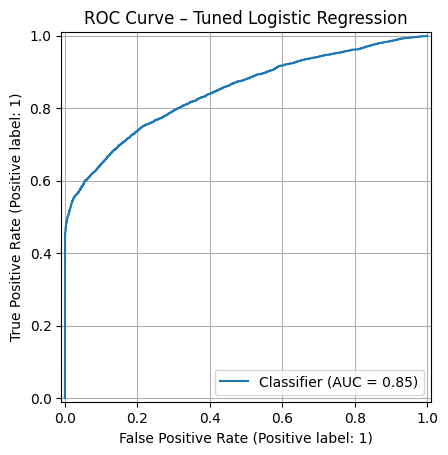

In [10]:
# logistic regression model 2 - with outlier flags included
# ============================
# Feature groups
# ============================

cat_features = [
    "loan_limit", "Gender", "approv_in_adv", "loan_type", "loan_purpose",
    "Credit_Worthiness", "open_credit", "business_or_commercial",
    "Neg_ammortization", "interest_only", "lump_sum_payment",
    "construction_type", "occupancy_type", "Secured_by", "total_units",
    "credit_type", "co-applicant_credit_type", "age",
    "submission_of_application", "Region", "Security_Type"
]

num_features = [
    "loan_amount", "term", "property_value", "income",
    "Credit_Score", "LTV", "dtir1"
]

# Missingness flags + Outlier flags
flag_features = [
    "dtir1_missing",
    "property_value_missing",
    "LTV_missing"
] + outlier_flags


# ============================
# Preprocessor
# ============================

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=True), cat_features),
        ("flag", "passthrough", flag_features)
    ]
)


# ============================
# Optuna objective
# ============================

def objective(trial):

    C = trial.suggest_float("C", 1e-4, 1e2, log=True)

    clf = LogisticRegression(
        C=C,
        penalty="l2",
        solver="lbfgs",
        class_weight="balanced",
        max_iter=3000,
        tol=1e-4
    )

    pipeline = Pipeline(
        steps=[
            ("preprocess", preprocessor),
            ("clf", clf)
        ]
    )

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    f1 = cross_val_score(
        pipeline,
        X_train,
        y_train,
        cv=cv,
        scoring="f1",
        n_jobs=-1
    ).mean()

    return f1


# ============================
# Run tuning (20 min limit)
# ============================

study = optuna.create_study(direction="maximize")

study.optimize(
    objective,
    n_trials=200,
    timeout=1200,
    show_progress_bar=True
)


# ============================
# Best parameters
# ============================

print("Best F1 (CV):", study.best_value)
print("Best params:", study.best_params)


# ============================
# Train final model
# ============================

best_params = study.best_params

final_model = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("clf", LogisticRegression(
            C=best_params["C"],      # only tuned parameter
            penalty="l2",            # fixed
            solver="lbfgs",          # fixed
            class_weight="balanced",
            max_iter=3000,           # fixed recommended value
            tol=1e-4
        ))
    ]
)

final_model.fit(X_train, y_train)


# ============================
# Evaluate on test set
# ============================

y_pred = final_model.predict(X_test)
y_proba = final_model.predict_proba(X_test)[:, 1]

f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
cm = confusion_matrix(y_test, y_pred)

print("\n===== TEST SET PERFORMANCE =====")
print(f"F1 Score     : {f1:.4f}")
print(f"Recall       : {recall:.4f}")
print(f"Accuracy     : {accuracy:.4f}")
print(f"ROC AUC      : {roc_auc:.4f}")
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


# ============================
# ROC Curve
# ============================

plt.figure(figsize=(6, 6))
RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("ROC Curve – Tuned Logistic Regression")
plt.grid(True)
plt.show()
